In [ ]:
# EDA - 1  -    Bike Details Dataset

In [1]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("BIKE DETAILS.csv")
df


name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]

In [3]:
# Q1)  What is the range of selling prices in the dataset

# Calculate the maximum and mean selling prices
max_price = df['selling_price'].max()
mean_price = df['selling_price'].mean()

# Subtract the mean from the max price
price_difference = max_price - mean_price
print(f"Difference between max and mean selling price: {price_difference}")


Difference between max and mean selling price: 700361.8482563619


In [4]:
# Q2)  What is the median selling price for bikes in the dataset

# Calculate the median selling price
median_price = df['selling_price'].median()
print(f"Median selling price: {median_price}")


Median selling price: 45000.0


In [5]:
# Q3) What is the most common seller type

# Find the most common seller type
most_common_seller_type = df['seller_type'].mode()[0]
print(f"The most common seller type is: {most_common_seller_type}")


The most common seller type is: Individual


In [6]:
# Q4)  How many bikes have driven more than 50,000 kilometers

# Count the number of bikes with more than 50,000 kilometers driven
bikes_over_50000_km = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes that have driven more than 50,000 kilometers: {bikes_over_50000_km}")


Number of bikes that have driven more than 50,000 kilometers: 170


In [9]:
# Q5) What is the average km_driven value for each ownership type

# Calculate the average km_driven for each ownership type
average_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(average_km_by_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [10]:
# Q6)  What proportion of bikes are from the year 2015 or older

# Calculate the proportion of bikes from the year 2015 or older
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion_2015_or_older = bikes_2015_or_older / total_bikes
print(f"Proportion of bikes from the year 2015 or older: {proportion_2015_or_older:.2f}")


Proportion of bikes from the year 2015 or older: 0.57


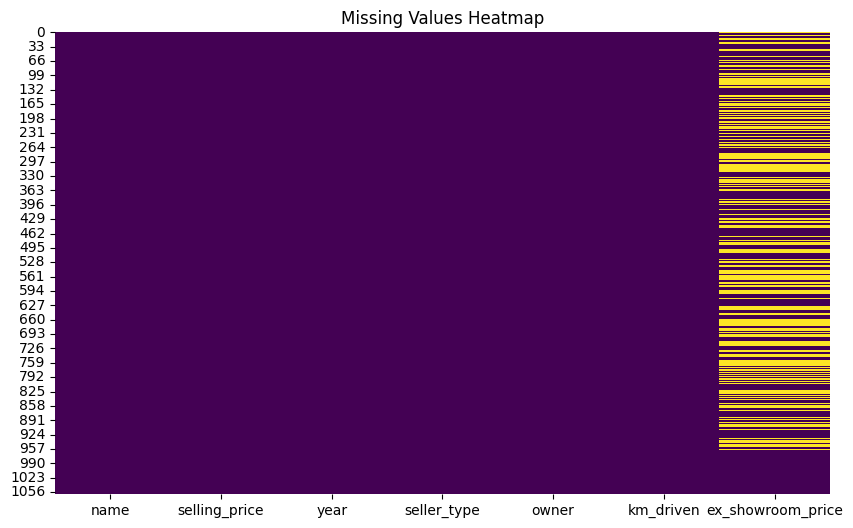

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [11]:
# Q7)  What is the trend of missing values across the dataset

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the missing values in the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Get the count of missing values for each column
missing_values_count = df.isnull().sum()
print("Missing values per column:")
print(missing_values_count)


In [13]:
# Q8)  What is the highest ex_showroom_price recorded, and for which bike

# Find the row with the highest ex_showroom_price
max_ex_showroom_price_row = df.loc[df['ex_showroom_price'].idxmax()]

# Get the highest ex_showroom_price and the corresponding bike name
max_ex_showroom_price = max_ex_showroom_price_row['ex_showroom_price']
bike_name = max_ex_showroom_price_row['name']

print(f"The highest ex-showroom price is {max_ex_showroom_price} for the bike: {bike_name}")


The highest ex-showroom price is 1278000.0 for the bike: Harley-Davidson Street Bob


In [14]:
# Q9)  What is the total number of bikes listed by each seller type

# Count the number of bikes listed by each seller type
seller_type_counts = df['seller_type'].value_counts()

print("Total number of bikes listed by each seller type:")
print(seller_type_counts)


Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


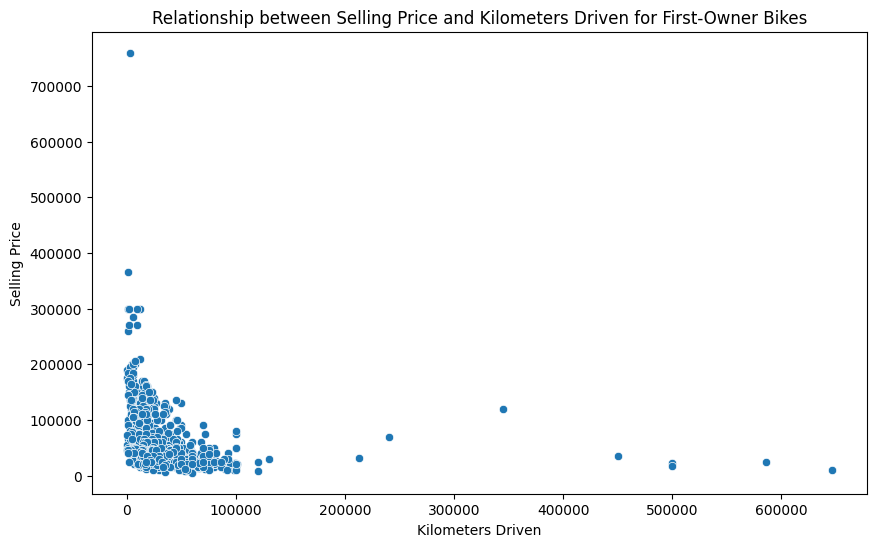

In [15]:
# Q10) What is the relationship between selling_price and km_driven for first-owner bikes

# Filter the dataset for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']

# Create a scatter plot to visualize the relationship between selling_price and km_driven for first-owner bikes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Relationship between Selling Price and Kilometers Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()


''' As observed from the scatter plot, there is a negative relationship between the kilometers driven and the selling price for first-owner bikes.
This indicates that as the kilometers driven increase, the selling price tends to decrease.
This trend suggests that higher usage (in terms of kilometers driven) reduces the resale value of bikes, which aligns with typical market behavior. '''

In [16]:
# Q11) Identify and remove outliers in the km_driven column using the IQR method.

# Calculate Q1 and Q3 for km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print(f"Number of outliers in km_driven: {outliers.shape[0]}")

# Remove outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Number of records after removing outliers: {df_cleaned.shape[0]}")


Number of outliers in km_driven: 39
Number of records after removing outliers: 1022


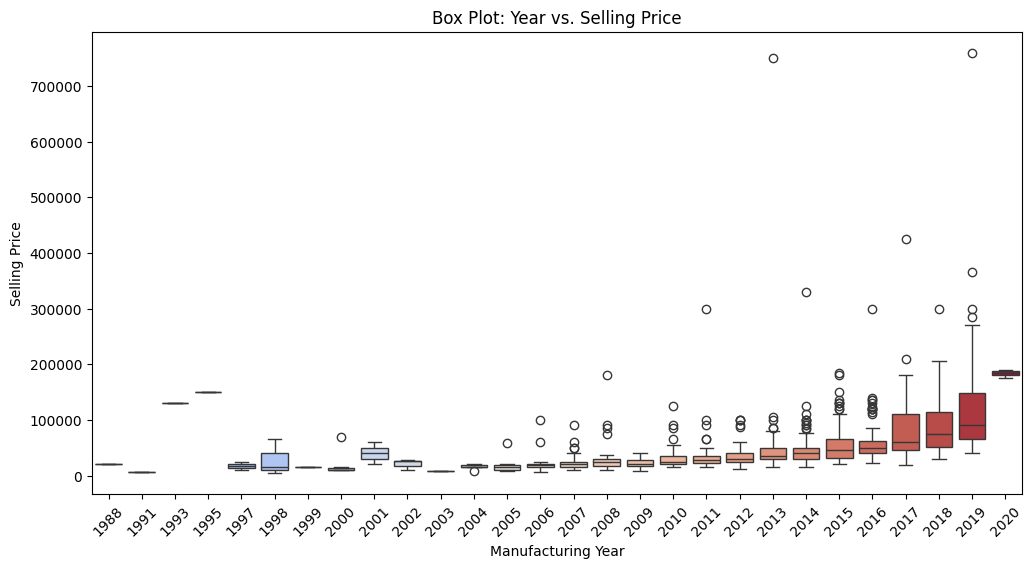

In [18]:
# Q12)  Perform a bivariate analysis to visualize the relationship between year and selling_price

# Box plot to visualize the relationship between year and selling_price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='selling_price', hue='year', dodge=False, palette='coolwarm', legend=False)
plt.title('Box Plot: Year vs. Selling Price')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()


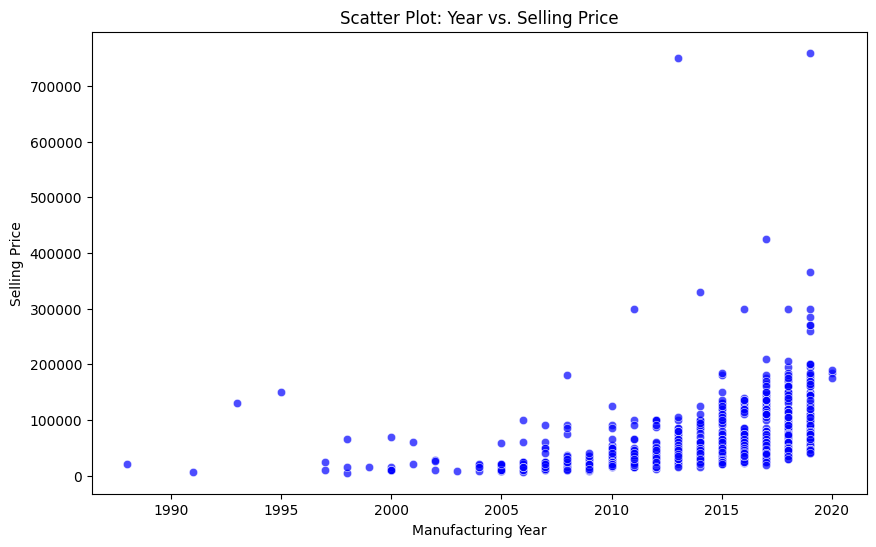

In [19]:
# Scatter plot to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.7, color='blue')
plt.title('Scatter Plot: Year vs. Selling Price')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price')
plt.show()


Average selling price based on the bike's age:
    age  selling_price
0     4  183333.333333
1     5  119689.511628
2     6   87660.374046
3     7   78894.736842
4     8   58469.018692
5     9   56500.000000
6    10   48668.131868
7    11   51136.986301
8    12   35748.400000
9    13   35655.721311
10   14   31793.333333
11   15   22267.857143
12   16   34289.285714
13   17   24927.586207
14   18   23380.000000
15   19   16978.571429
16   20   15100.000000
17   21    8000.000000
18   22   20666.666667
19   23   40000.000000
20   24   20833.333333
21   25   15000.000000
22   26   28333.333333
23   27   17500.000000
24   29  150000.000000
25   31  130000.000000
26   33    6000.000000
27   36   20000.000000


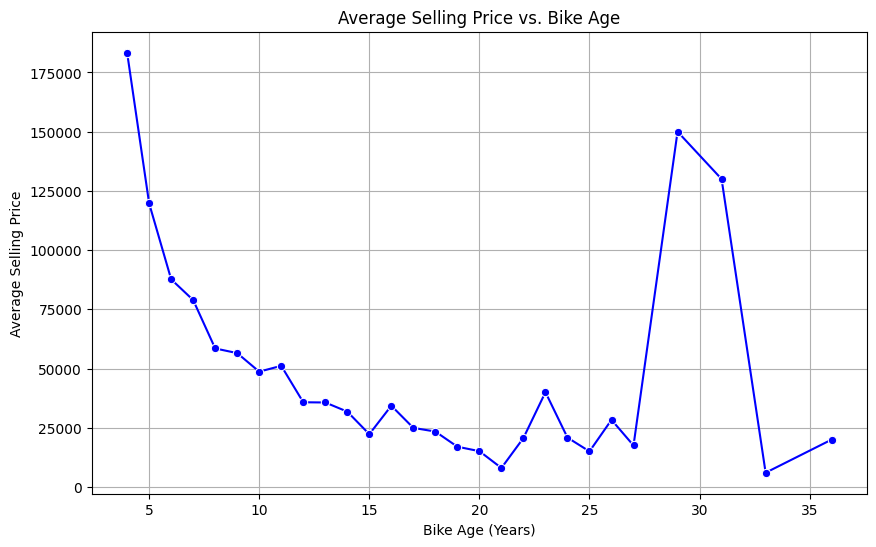

In [20]:
# Q13)  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate the bike's age
df['age'] = current_year - df['year']

# Calculate the average selling price for each age group
avg_depreciation = df.groupby('age')['selling_price'].mean().reset_index()

# Display the result
print("Average selling price based on the bike's age:")
print(avg_depreciation)

# Plot the result for better visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_depreciation, x='age', y='selling_price', marker='o', color='blue')
plt.title('Average Selling Price vs. Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price')
plt.grid()
plt.show()


In [21]:
# Q14) Which bike names are priced significantly above the average price for their manufacturing year

# Calculate the average selling price for each manufacturing year
year_avg_price = df.groupby('year')['selling_price'].mean()

# Add a column for the average price of the manufacturing year
df['year_avg_price'] = df['year'].map(year_avg_price)

# Identify bikes priced significantly above the average (e.g., 1.5x the average price)
above_avg_bikes = df[df['selling_price'] > 1.5 * df['year_avg_price']]

# Display bike names and their details
print("Bikes priced significantly above the average for their manufacturing year:")
print(above_avg_bikes[['name', 'year', 'selling_price', 'year_avg_price']])


Bikes priced significantly above the average for their manufacturing year:
                                     name  year  selling_price  year_avg_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000    34289.285714
13                          Yamaha YZF R3  2019         365000   119689.511628
18    Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046
23                          Jawa Standard  2019         180000   119689.511628
..                                    ...   ...            ...             ...
979             Royal Enfield Thunder 500  2015         105000    56500.000000
981             Royal Enfield Thunder 350  2013         105000    51136.986301
983             Royal Enfield Classic 350  2015         100000    56500.000000
984             Royal Enfield Classic 500  2014          95000    48668.131868
985             Royal Enfield Classic 500  2011         

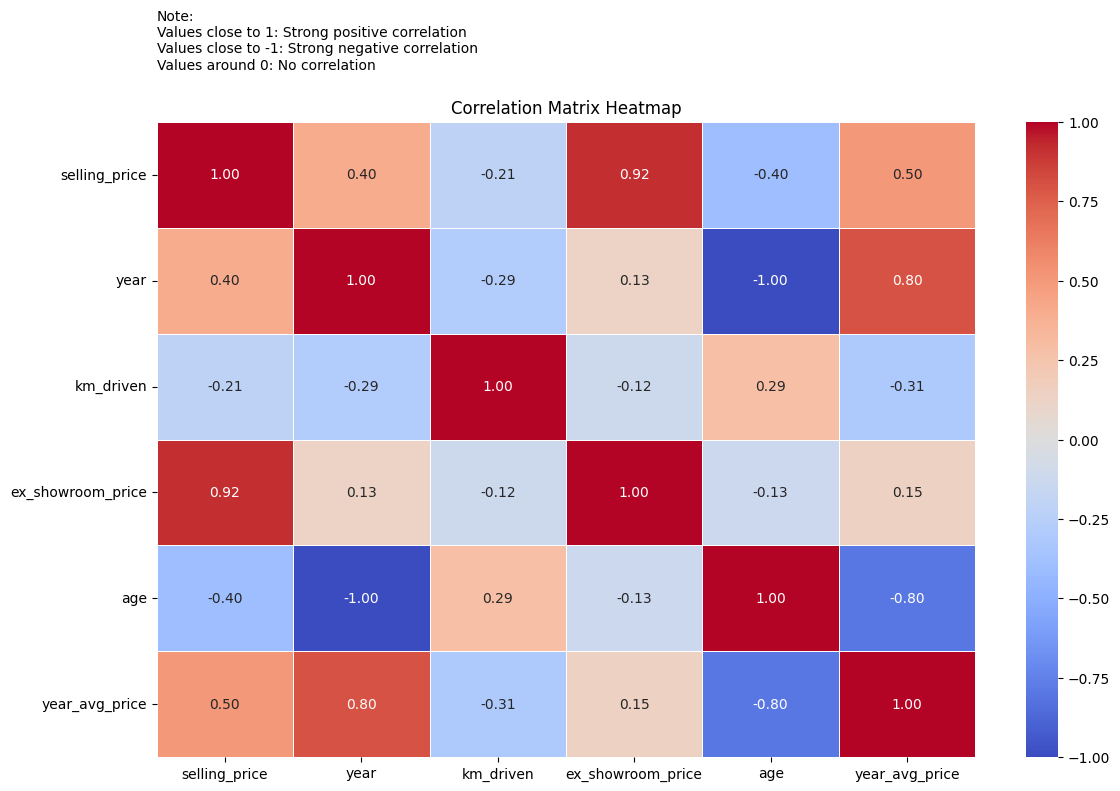

In [23]:
# Q15)  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

# Add a note below the graph
plt.text(
    0, -0.5,
    "Note:\n"
    "Values close to 1: Strong positive correlation\n"
    "Values close to -1: Strong negative correlation\n"
    "Values around 0: No correlation",
    fontsize=10, color='black'
)

plt.tight_layout()
plt.show()


In [ ]:
# EDA 2 - Car Sale Dataset

In [24]:
from google.colab import files
# Upload the file
uploaded = files.upload()



Saving Car Sale.csv to Car Sale.csv


In [25]:
# Load the dataset into a Pandas DataFrame
df_car = pd.read_csv("Car Sale.csv")  # Replace 'your_dataset.csv' with the actual file name
df_car

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

Average selling price for each dealer:
                                        Dealer_Name     Price ($)
0               Buddy Storbeck's Diesel Service Inc  27217.261563
1                                  C & M Motors Inc  28111.755200
2                                       Capitol KIA  28189.703822
3                                 Chrysler Plymouth  27555.526400
4                            Chrysler of Tri-Cities  28123.091054
5                                     Classic Chevy  28602.014446
6                           Clay Johnson Auto Sales  27816.027113
7                                Diehl Motor CO Inc  27993.929487
8                             Enterprise Rent A Car  28312.580800
9                        Gartner Buick Hyundai Saab  28247.621019
10                              Hatfield Volkswagen  27853.712242
11                                  Iceberg Rentals  28522.958533
12                     McKinney Dodge Chrysler Jeep  27684.096979
13                      Motor Vehicle

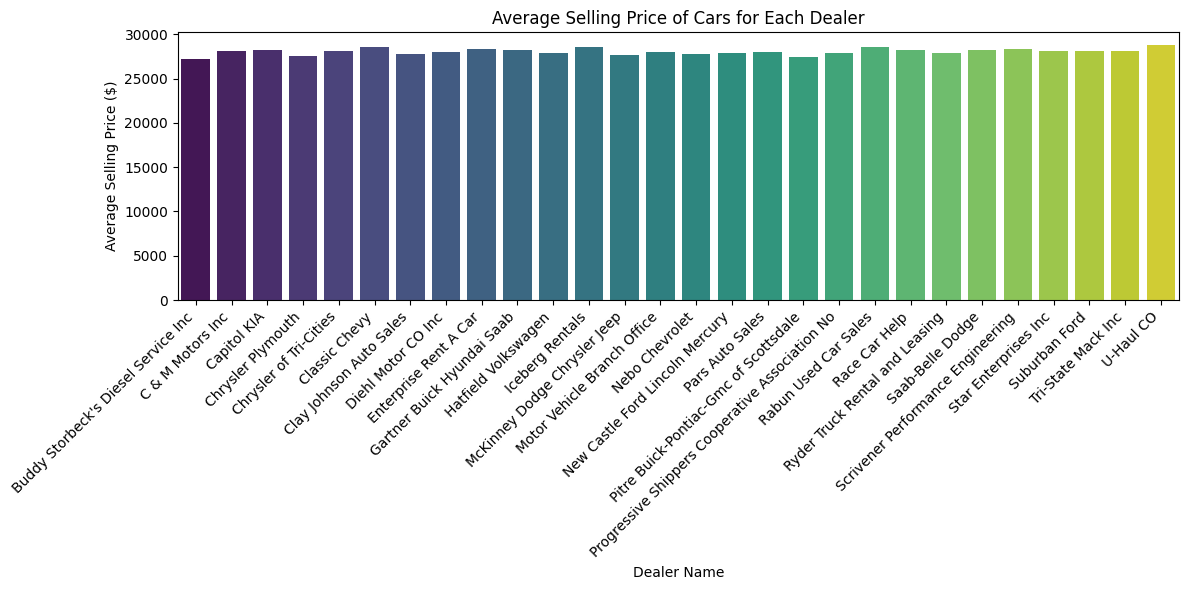

In [28]:
# Q1) What is the average selling price of cars for each dealer, and how does it compare across different dealers

# Calculate the average selling price for each dealer
average_price_by_dealer = df_car.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Display the average prices
print("Average selling price for each dealer:")
print(average_price_by_dealer)
# Visualize the average selling price by dealer with hue assigned to 'x'
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_by_dealer, x='Dealer_Name', y='Price ($)', hue='Dealer_Name', palette='viridis', legend=False)
plt.title('Average Selling Price of Cars for Each Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate dealer names for better visibility
plt.tight_layout()
plt.show()


Car brand with the highest variation in prices:
Company           Lincoln
Price ($)    19658.050211
Name: 15, dtype: object


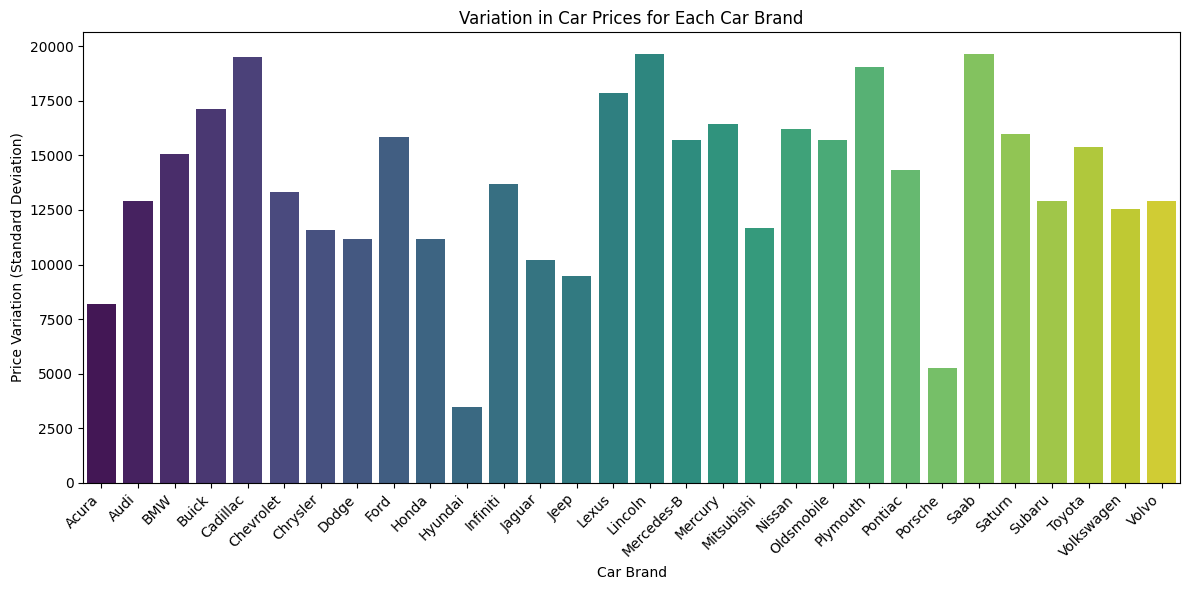

In [36]:
# Q2) Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

# Calculate the standard deviation of price for each car brand
price_variation_by_brand = df_car.groupby('Company')['Price ($)'].std().reset_index()

# Find the brand with the highest price variation
max_variation_brand = price_variation_by_brand.loc[price_variation_by_brand['Price ($)'].idxmax()]

print("Car brand with the highest variation in prices:")
print(max_variation_brand)

# Visualize the variation in price for each brand with hue assigned to 'Company'
plt.figure(figsize=(12, 6))
sns.barplot(data=price_variation_by_brand, x='Company', y='Price ($)', hue='Company', palette='viridis', legend=False)
plt.title('Variation in Car Prices for Each Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=45, ha='right')  # Rotate car brand names for better visibility
plt.tight_layout()
plt.show()




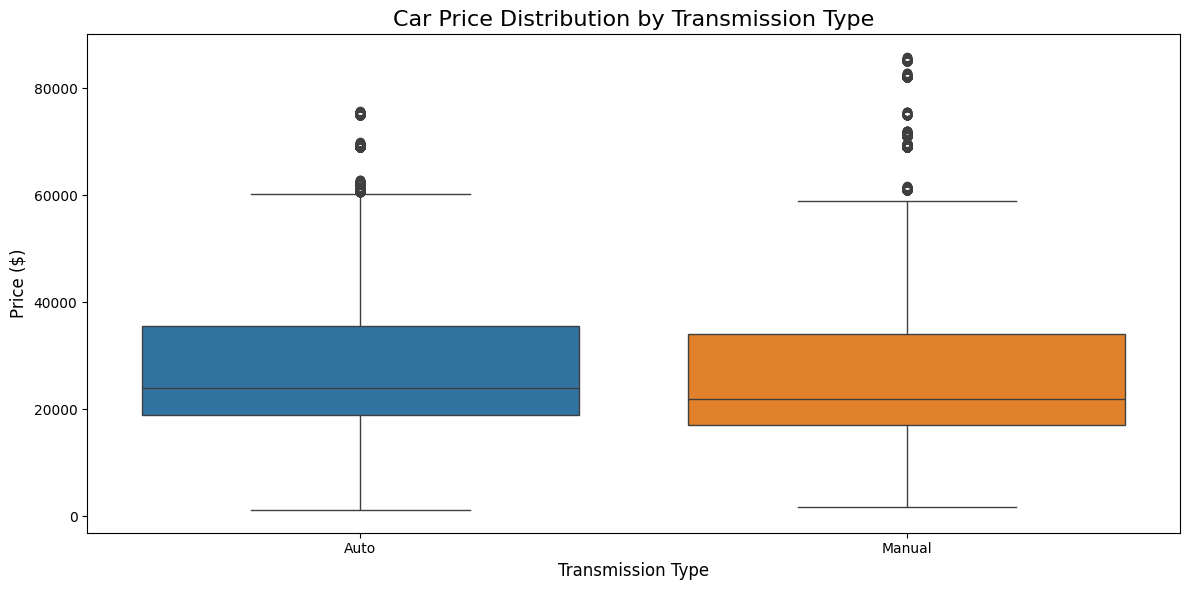

In [38]:
# Q3)  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

# Visualize the distribution of car prices for each transmission type using a box plot

plt.figure(figsize=(12, 6))  # Increase figure size for better visibility
sns.boxplot(data=df_car, x='Transmission', y='Price ($)', hue='Transmission')  # Assign 'Transmission' to hue
plt.title('Car Price Distribution by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.show()


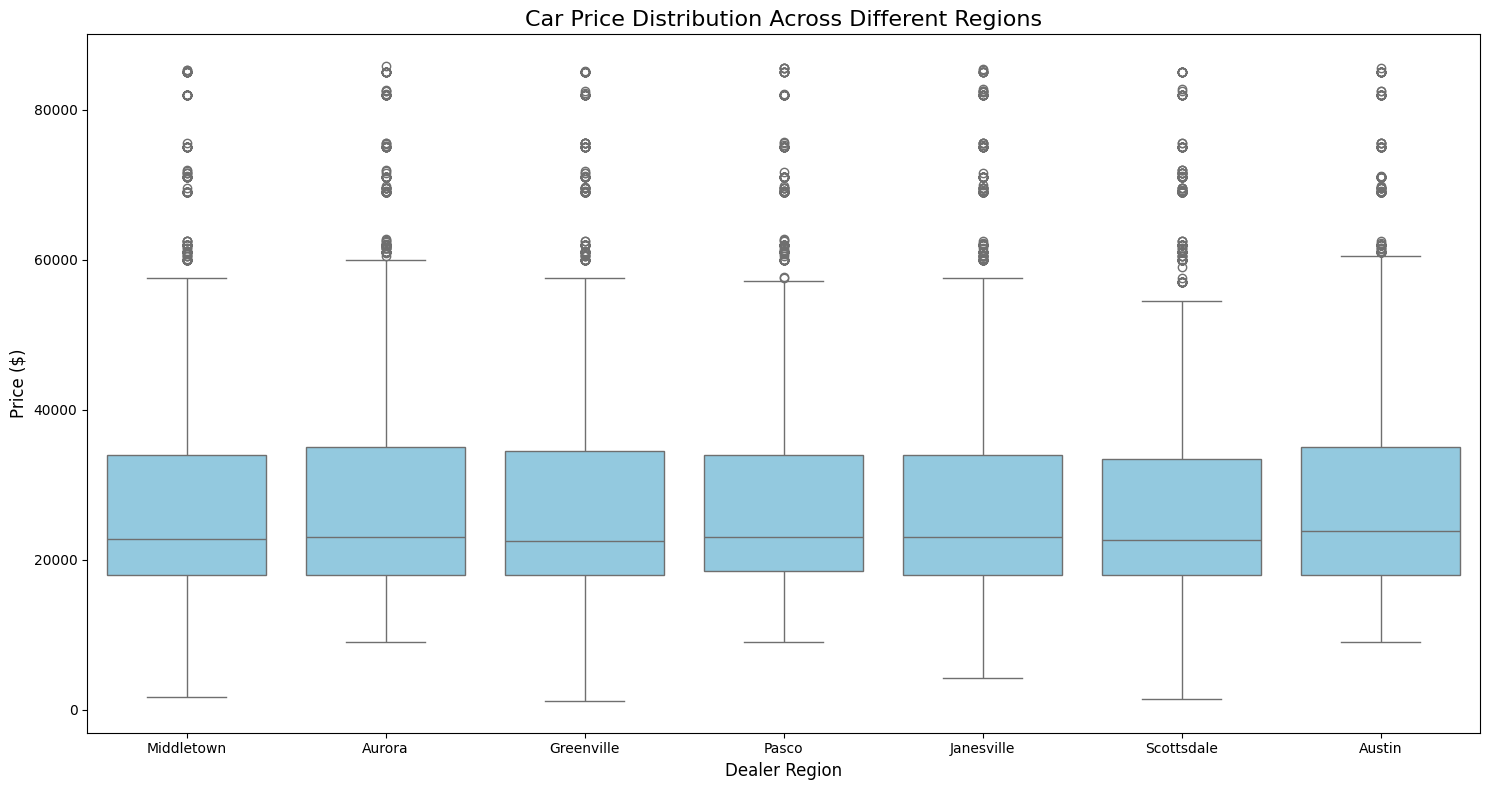

In [40]:
# Q4)  What is the distribution of car prices across different regions

# Visualize the distribution of car prices across different dealer regions using a box plot
plt.figure(figsize=(15, 8))  # Increase figure size for better visibility
sns.boxplot(data=df_car, x='Dealer_Region', y='Price ($)', color='skyblue')  # Remove palette argument
plt.title('Car Price Distribution Across Different Regions', fontsize=16)
plt.xlabel('Dealer Region', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.show()


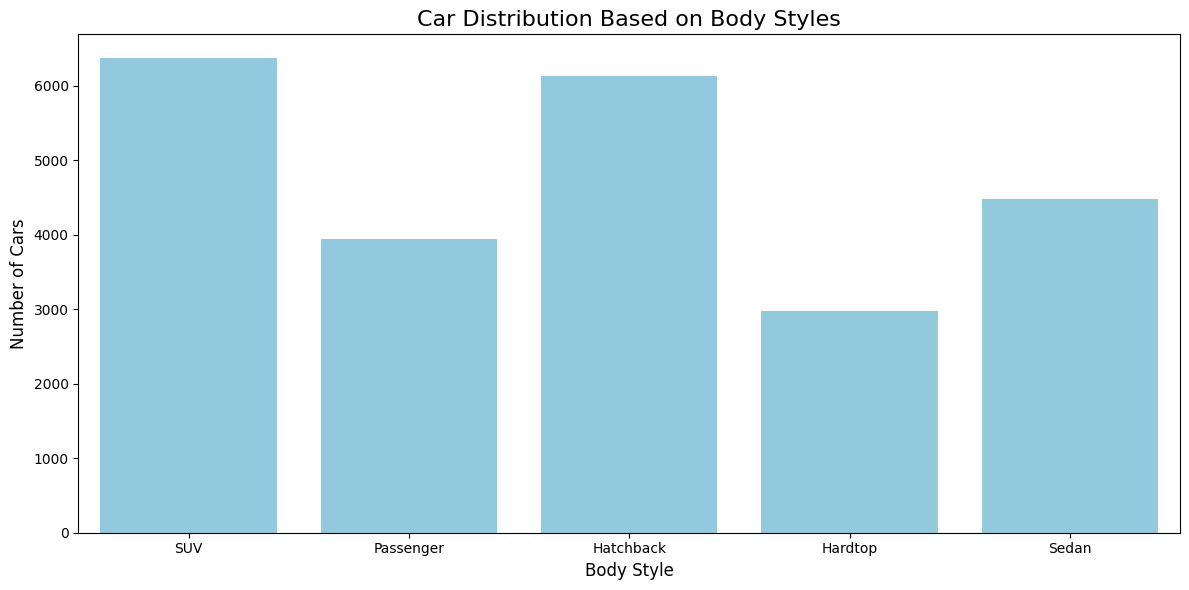

In [42]:
 # Q4) What is the distribution of cars based on body styles

 # Visualize the distribution of cars based on body styles using a count plot
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility
sns.countplot(data=df_car, x='Body Style', color='skyblue')  # Set color without palette
plt.title('Car Distribution Based on Body Styles', fontsize=16)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.tight_layout()
plt.show()


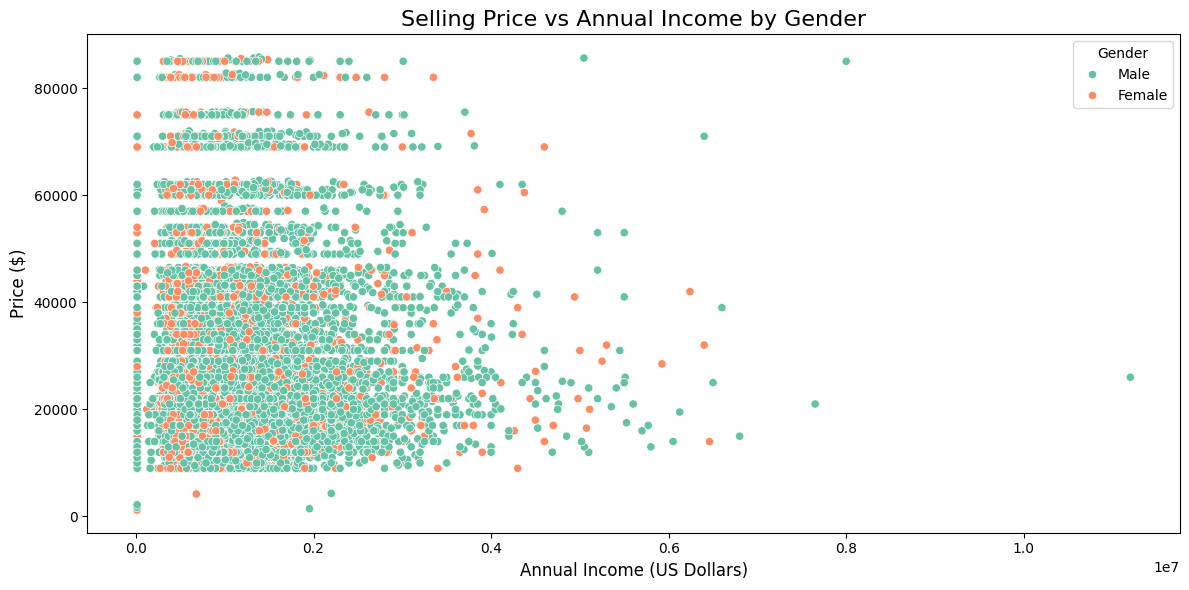

In [43]:
# Q6) How does the average selling price of cars vary by customer gender and annual income

# Visualize the relationship between customer gender, annual income, and selling price using a scatter plot
plt.figure(figsize=(12, 6))  # Set figure size
sns.scatterplot(data=df_car, x='Annual Income', y='Price ($)', hue='Gender', palette='Set2')  # Use hue for gender
plt.title('Selling Price vs Annual Income by Gender', fontsize=16)
plt.xlabel('Annual Income (US Dollars)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.show()


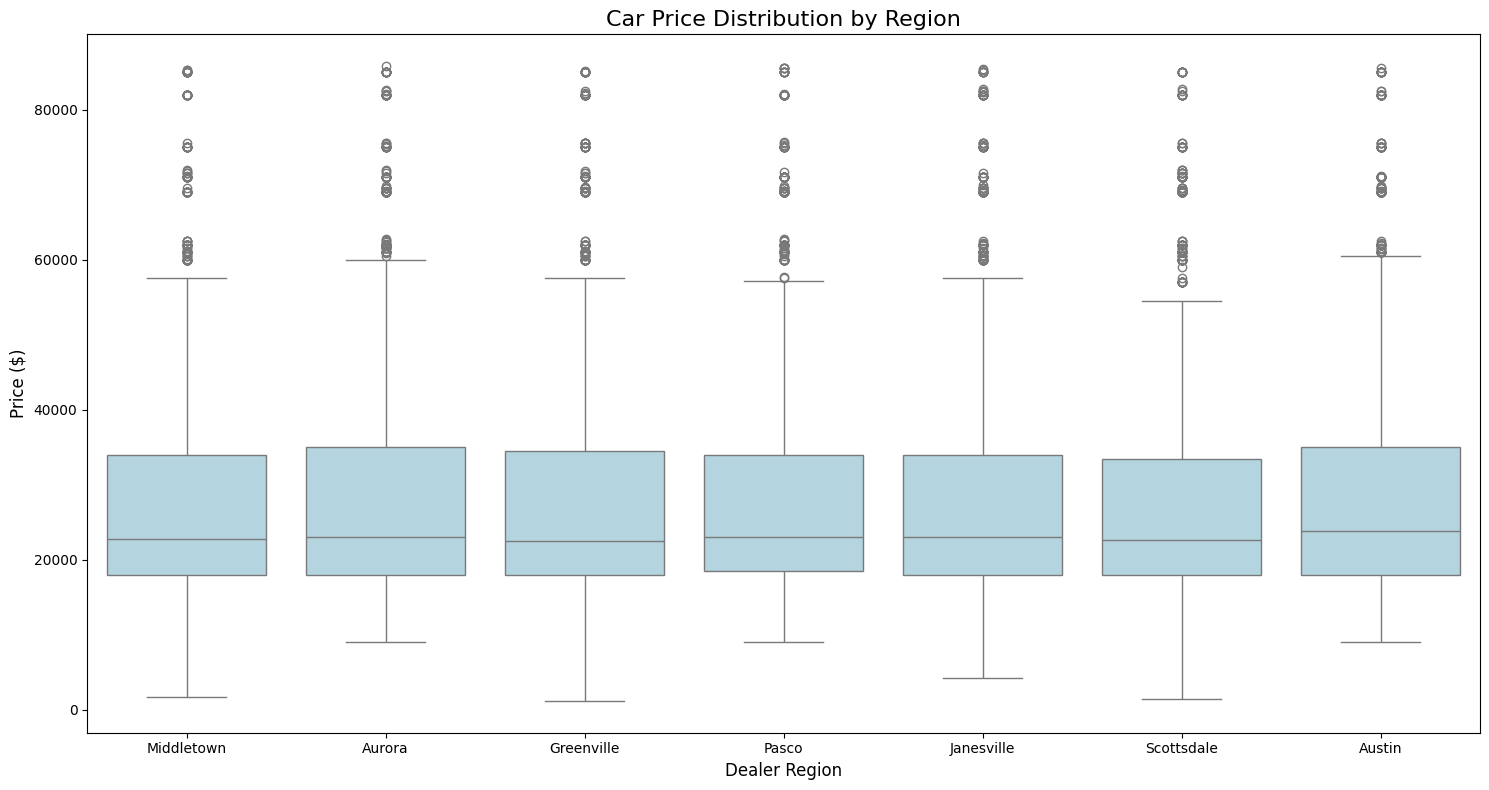





\n


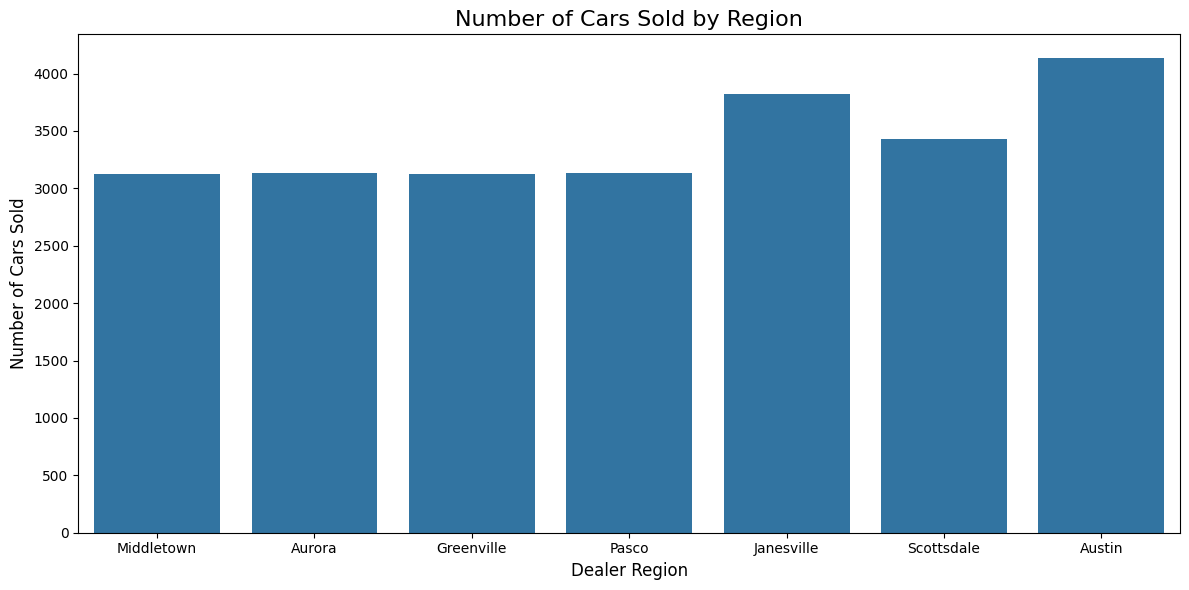

In [46]:
# Q7) What is the distribution of car prices by region, and how does the number of cars sold vary by region

# Visualize the distribution of car prices by region using a box plot
plt.figure(figsize=(15, 8))  # Set figure size for better visibility
sns.boxplot(data=df_car, x='Dealer_Region', y='Price ($)', color='lightblue')  # Box plot with color
plt.title('Car Price Distribution by Region', fontsize=16)
plt.xlabel('Dealer Region', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.show()
print("\n\n\n\n\\n")
# Visualize the number of cars sold by region using a count plot
plt.figure(figsize=(12, 6))  # Set figure size for better visibility
sns.countplot(data=df_car, x='Dealer_Region')  # Count plot for regions
plt.title('Number of Cars Sold by Region', fontsize=16)
plt.xlabel('Dealer Region', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.tight_layout()
plt.show()



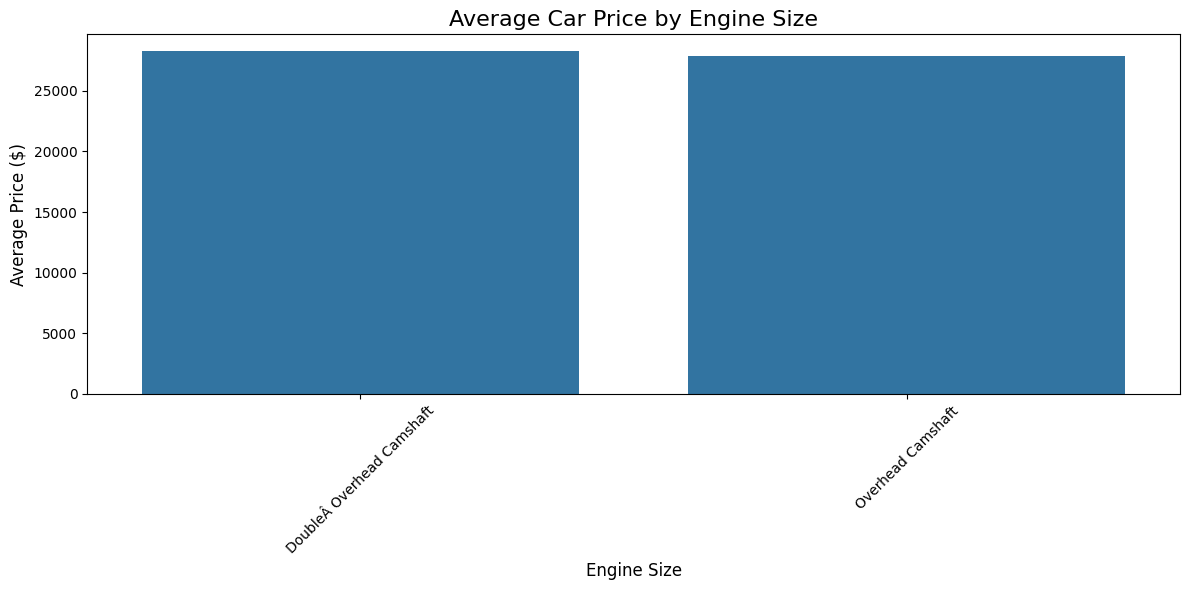

In [48]:
# Q8)  How does the average car price differ between cars with different engine sizes

# Calculate the average car price for each engine size
average_price_by_engine = df_car.groupby('Engine')['Price ($)'].mean().reset_index()

# Sort the data by average price for better visualization
average_price_by_engine = average_price_by_engine.sort_values(by='Price ($)', ascending=False)

# Visualize the average car price by engine size using a bar plot
plt.figure(figsize=(12, 6))  # Set figure size for better visibility
sns.barplot(data=average_price_by_engine, x='Engine', y='Price ($)')  # Bar plot without 'palette'
plt.title('Average Car Price by Engine Size', fontsize=16)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


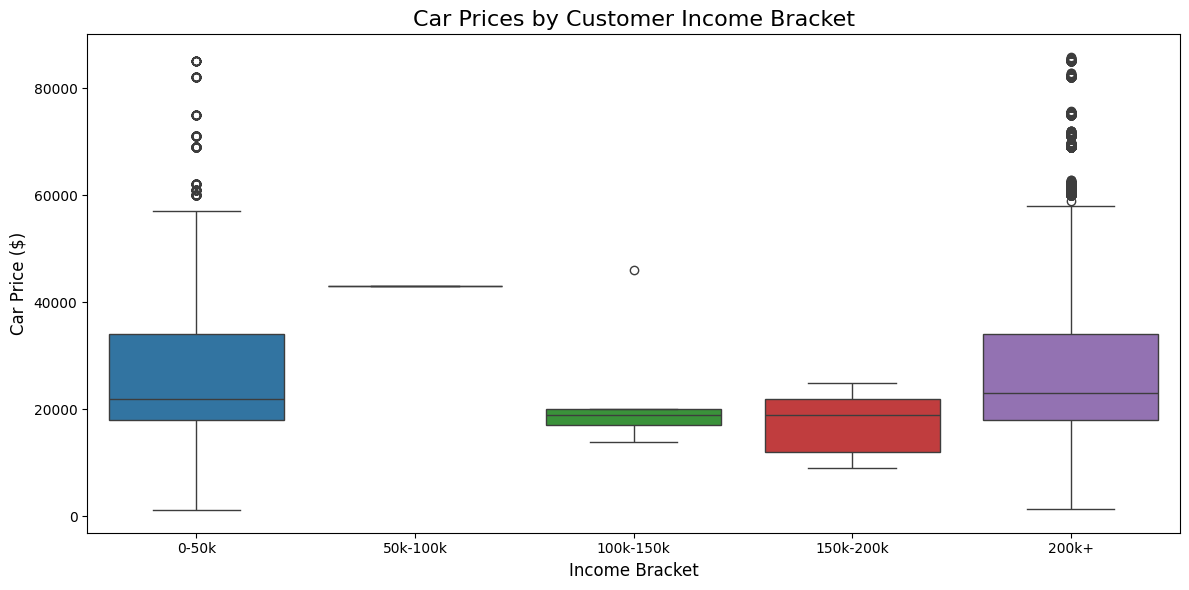

In [50]:
# Q9)  How do car prices vary based on the customer’s annual income bracket

# Visualize the car prices based on income brackets using a box plot
plt.figure(figsize=(12, 6))  # Set figure size for better visibility
sns.boxplot(data=df_car, x='Income_Bracket', y='Price ($)', hue='Income_Bracket')  # Set hue to avoid the warning
plt.title('Car Prices by Customer Income Bracket', fontsize=16)
plt.xlabel('Income Bracket', fontsize=12)
plt.ylabel('Car Price ($)', fontsize=12)
plt.tight_layout()
plt.show()


Top 5 Car Models with the Highest Number of Sales:
Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


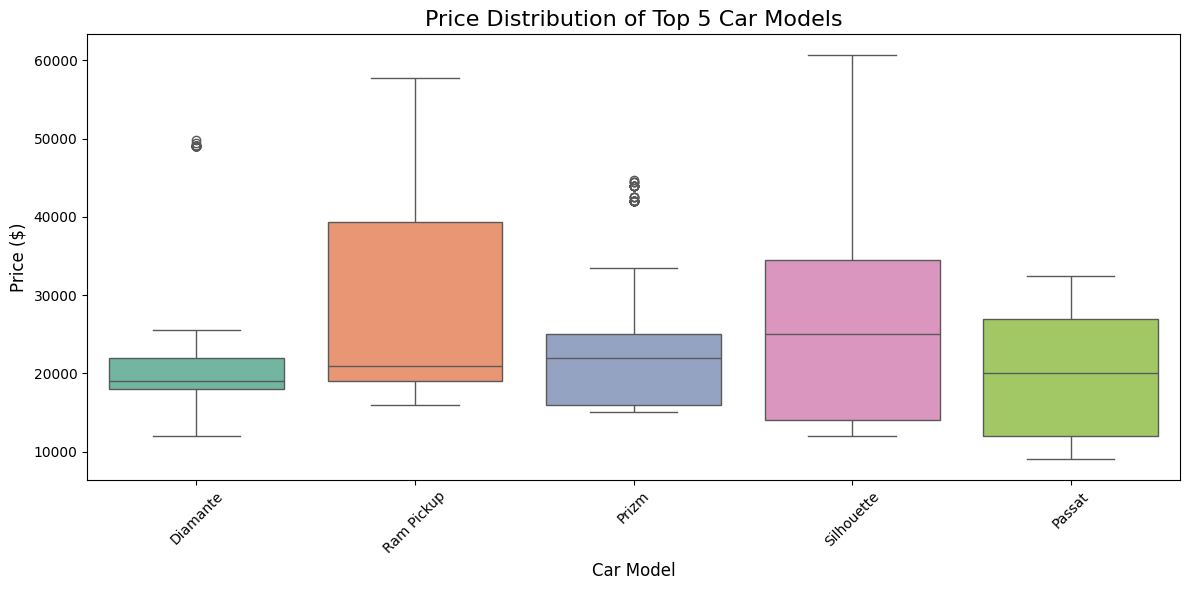

In [53]:
# Q10)  What are the top 5 car models with the highest number of sales, and how does their price distribution look

# Count the number of sales for each car model
top_models_count = df_car['Model'].value_counts().nlargest(5)  # Get the top 5 car models with their counts

# Print the names and sales count of the top 5 car models
print("Top 5 Car Models with the Highest Number of Sales:")
print(top_models_count)

# Filter the dataset for the top 5 models
top_models_data = df_car[df_car['Model'].isin(top_models_count.index)]

# Visualize the price distribution of the top 5 car models using a box plot
plt.figure(figsize=(12, 6))  # Set figure size for better visibility
sns.boxplot(data=top_models_data, x='Model', y='Price ($)', hue='Model', palette='Set2')  # Corrected for warning
plt.title('Price Distribution of Top 5 Car Models', fontsize=16)
plt.xlabel('Car Model', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


Colors with the highest price variation (Standard Deviation of Price):
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


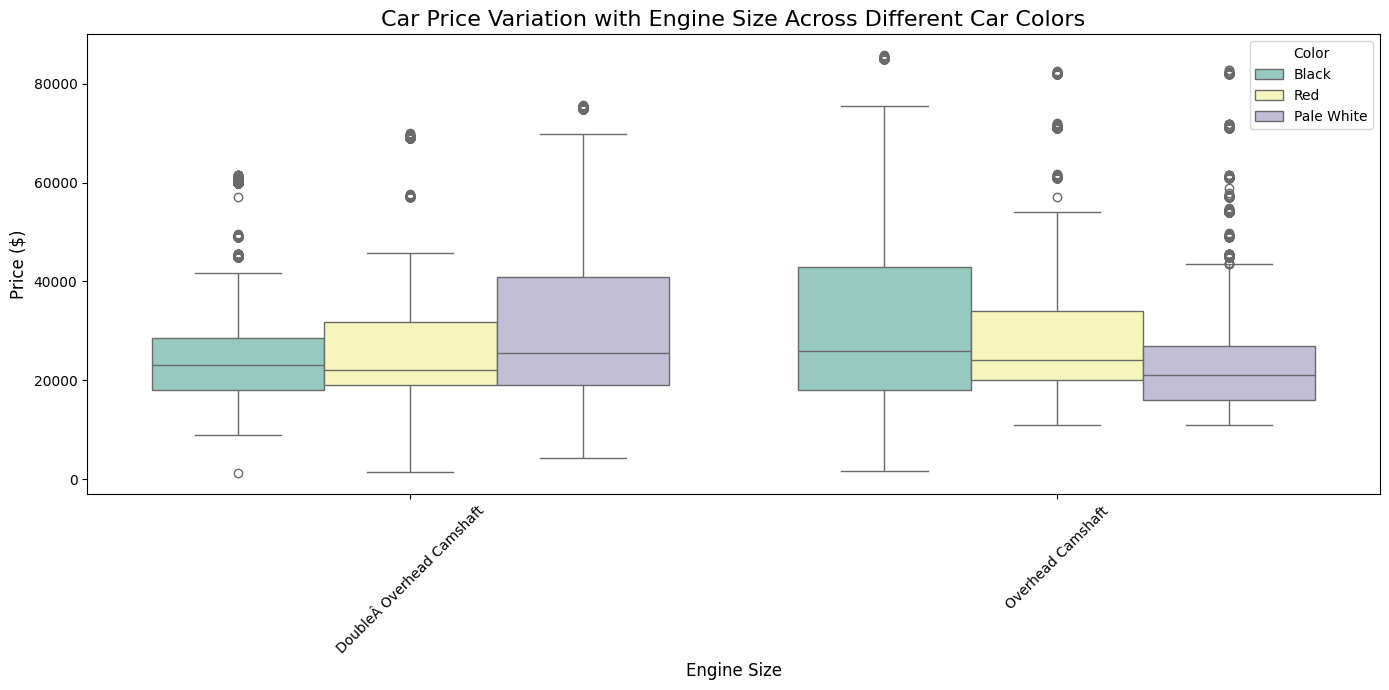

In [55]:
# Q11)  How does car price vary with engine size across different car colors, and which colors have the highest price variation

# Calculate the price variation (standard deviation) by car color to identify colors with the highest variation
price_variation_by_color = df_car.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

# Print the colors with the highest price variation
print("Colors with the highest price variation (Standard Deviation of Price):")
print(price_variation_by_color.head(5))

# Visualize the relationship between car price and engine size across different car colors
plt.figure(figsize=(14, 7))  # Set figure size for better visibility
sns.boxplot(data=df_car, x='Engine', y='Price ($)', hue='Color', palette='Set3')  # Boxplot for engine size and price, differentiated by color
plt.title('Car Price Variation with Engine Size Across Different Car Colors', fontsize=16)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


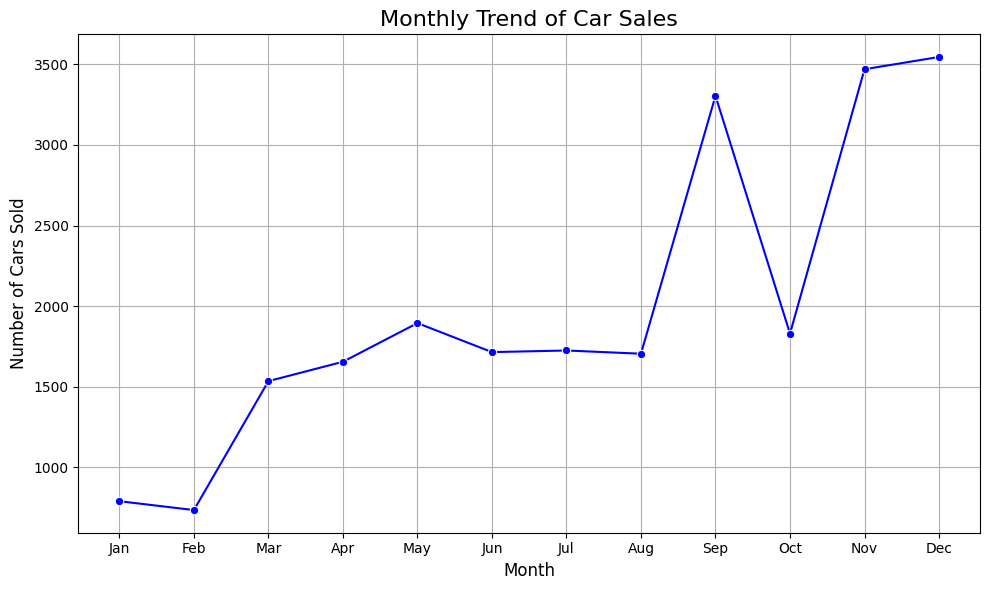

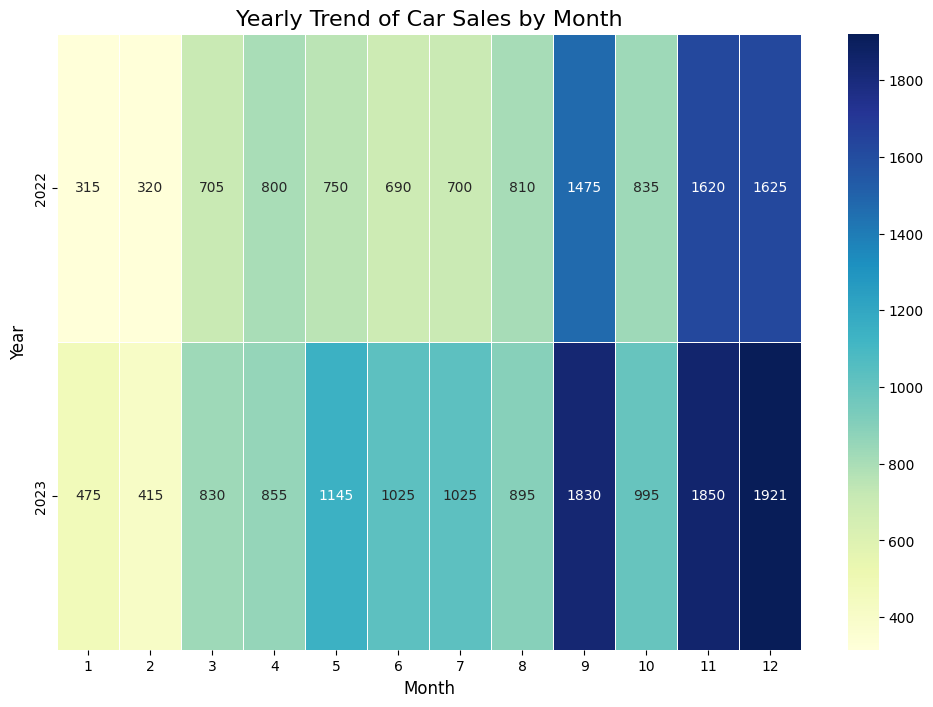

In [56]:
# Q12)  Is there any seasonal trend in car sales based on the date of sale

# Convert the 'Date' column to datetime format if not already
df_car['Date'] = pd.to_datetime(df_car['Date'])

# Extract the month and year from the sale date
df_car['Month'] = df_car['Date'].dt.month
df_car['Year'] = df_car['Date'].dt.year

# Count the number of car sales per month
monthly_sales = df_car.groupby('Month').size()

# Plot the number of car sales per month to identify any seasonal trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')  # Line plot for monthly sales
plt.title('Monthly Trend of Car Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Alternatively, you can also group by year and month to see a yearly trend
monthly_sales_by_year = df_car.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Plot the sales trend by year and month
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales_by_year, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Yearly Trend of Car Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.show()


In [ ]:
'''
January and February: Sales are below 1000, indicating a potential seasonal dip, possibly due to factors like post-holiday slowdowns or economic conditions at the start of the year.
March to August: Sales are between 1500 and 2000, showing a steady increase in sales during these months, which may reflect more buying activity, possibly due to warmer weather or promotional sales during this period.
September: Sales peak at 3300, possibly due to festive seasons or end-of-year clearance events.
October: A dip to 1800, possibly as the market adjusts after the peak in September.
November and December: Sales are above 3000, which could be due to year-end promotions, holiday sales, or new car models being introduced.   '''

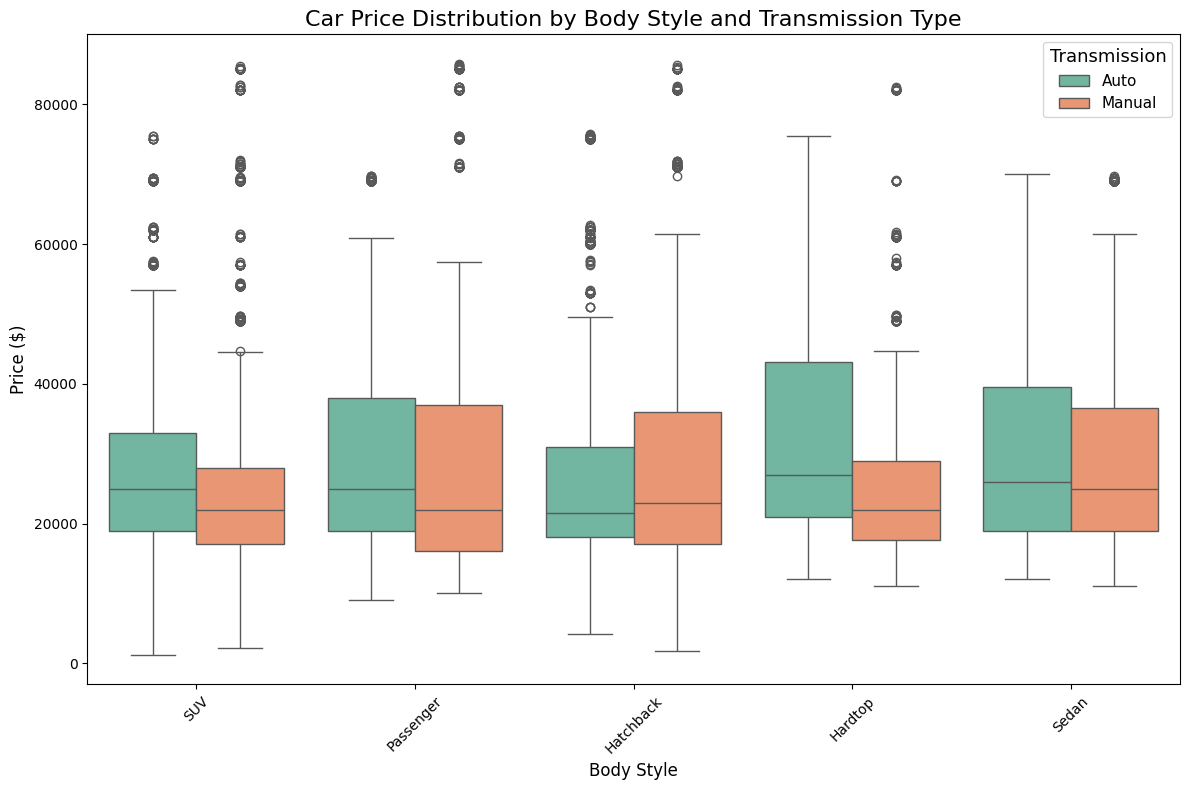

In [58]:
# Q13)  How does the car price distribution change when considering different combinations of body style and transmission type

import seaborn as sns
import matplotlib.pyplot as plt

# Creating a box plot to show the price distribution based on body style and transmission type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_car, x='Body Style', y='Price ($)', hue='Transmission', palette='Set2')

# Adding titles and labels
plt.title('Car Price Distribution by Body Style and Transmission Type', fontsize=16)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Transmission', title_fontsize='13', fontsize='11')

# Display the plot
plt.tight_layout()
plt.show()


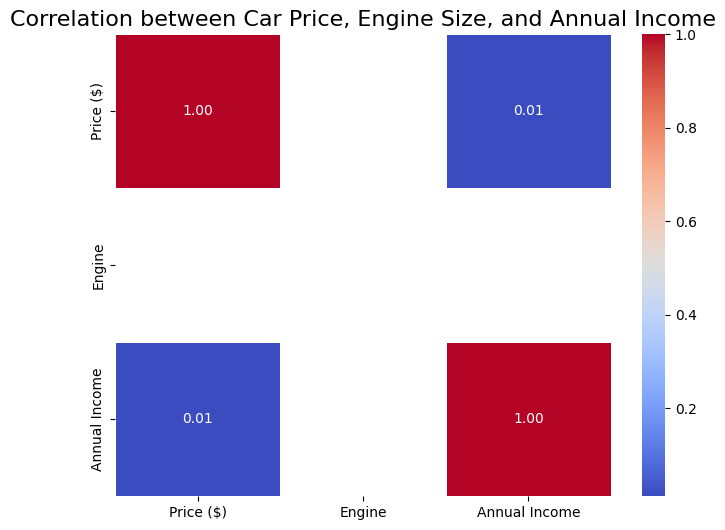

In [60]:
# Q14)  What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Engine' column to numeric values (if it's categorical)
df_car['Engine'] = df_car['Engine'].map({'V6': 6, 'I4': 4, 'I8': 8, 'I6': 6, 'V8': 8, 'I3': 3})  # Example mapping

# Select the relevant columns for correlation
correlation_data = df_car[['Price ($)', 'Engine', 'Annual Income']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding titles and labels
plt.title('Correlation between Car Price, Engine Size, and Annual Income', fontsize=16)
plt.show()


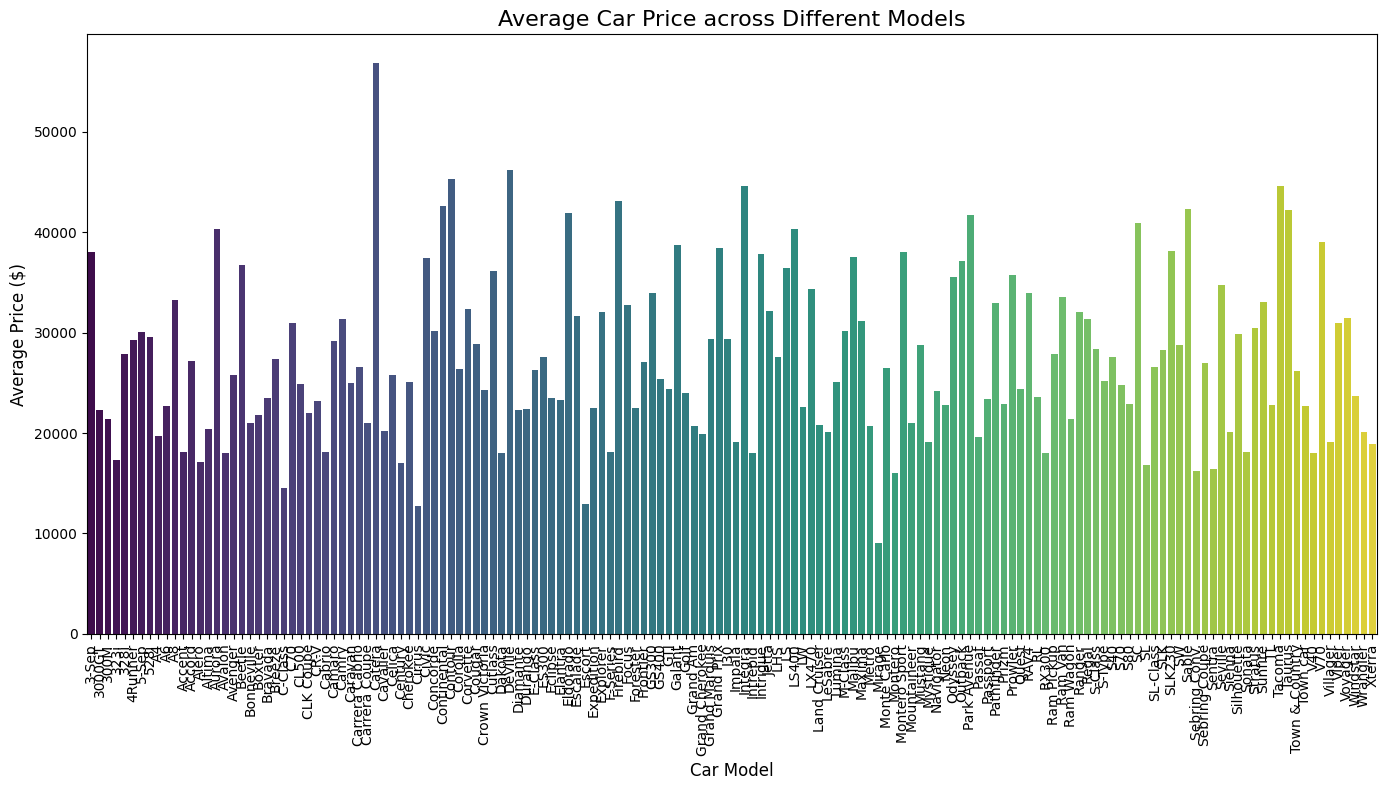

In [68]:
# Q15) How does the average car price vary across different car models and engine types?

# Drop rows where 'Engine' column has NaN values
df_car_cleaned = df_car.dropna(subset=['Engine'])

# Group by Model and calculate the average price
average_price_by_model = df_car.groupby(['Model'])['Price ($)'].mean().reset_index()

# Plotting the average car price by model
plt.figure(figsize=(14, 8))
sns.barplot(data=average_price_by_model, x='Model', y='Price ($)', hue='Model', palette='viridis', legend=False)

# Adding titles and labels
plt.title('Average Car Price across Different Models', fontsize=16)
plt.xlabel('Car Model', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


In [ ]:
#      EDA 3   -  Amazon Sales Data

In [69]:
from google.colab import files
uploaded = files.upload()


Saving amazon.csv to amazon.csv


In [70]:
df_amazon=pd.read_csv("amazon.csv")
df_amazon

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%    4.0       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [73]:
# Q1) What is the average rating for each product category

# Convert the 'rating' column to numeric, forcing errors to NaN (in case of any non-numeric values)
df_amazon['rating'] = pd.to_numeric(df_amazon['rating'], errors='coerce')

# Calculate the average rating for each product category
average_rating_by_category = df_amazon.groupby('category')['rating'].mean().reset_index()

# Display the result
average_rating_by_category


category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]

In [74]:
# Q2) What are the top rating_count products by category

# Group by category and find the product with the highest rating_count in each category
top_rating_count_by_category = df_amazon.loc[df_amazon.groupby('category')['rating_count'].idxmax()]

# Display the result
top_rating_count_by_category[['category', 'product_name', 'rating_count']]


category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222  
772   HUMBLE Dynamic Lapel Collar Mic Voice Recordin...        2,804  
844   Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...        7,352  
...                                                 ...          ...  
616   Classmate Octane Neon- Blue Gel Pens(Pack of 5...        5,792  
993   Pilot Frixion Clicker Roller Pen (Blue), (9000...        6,199  
765              Parker Classic Gold Gold Trim Ball Pen        5,719  
850      Pentonic Multicolor Ball Point Pen, Pack of 10        4,308  
924   Faber-Castell Connector Pen Set - Pack of 25 (...       15,867  

[211 rows x 3 columns]

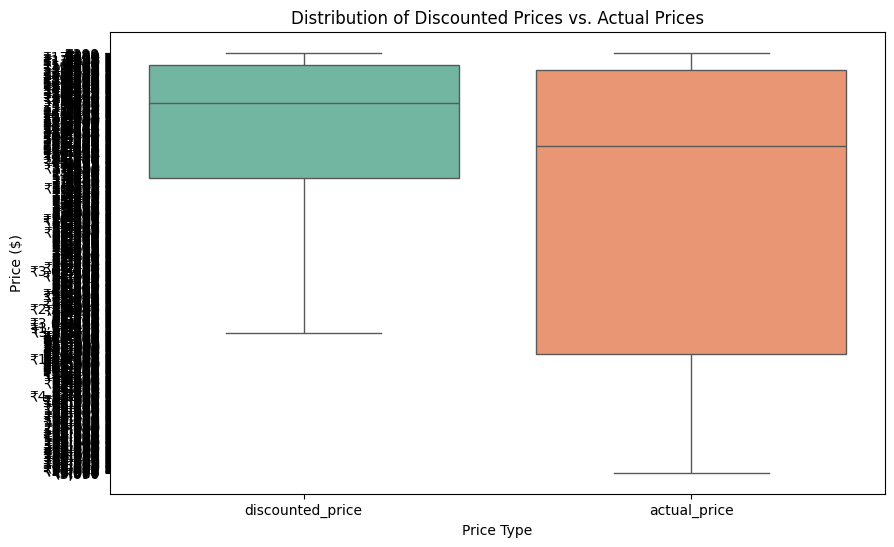

In [76]:
# Q3) What is the distribution of discounted prices vs. actual prices

import seaborn as sns
import matplotlib.pyplot as plt

# Melt the data to combine the 'discounted_price' and 'actual_price' columns for comparison
df_amazon_melted = df_amazon[['discounted_price', 'actual_price']].melt(var_name='Price Type', value_name='Price')

# Create a boxplot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price Type', y='Price', data=df_amazon_melted, hue='Price Type', palette='Set2', legend=False)

# Add title and labels
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.ylabel('Price ($)')
plt.xlabel('Price Type')

# Show the plot
plt.show()


<ipython-input-84-d3437069ef30>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_discount_by_category, x='category', y='discount_percentage', palette='viridis')


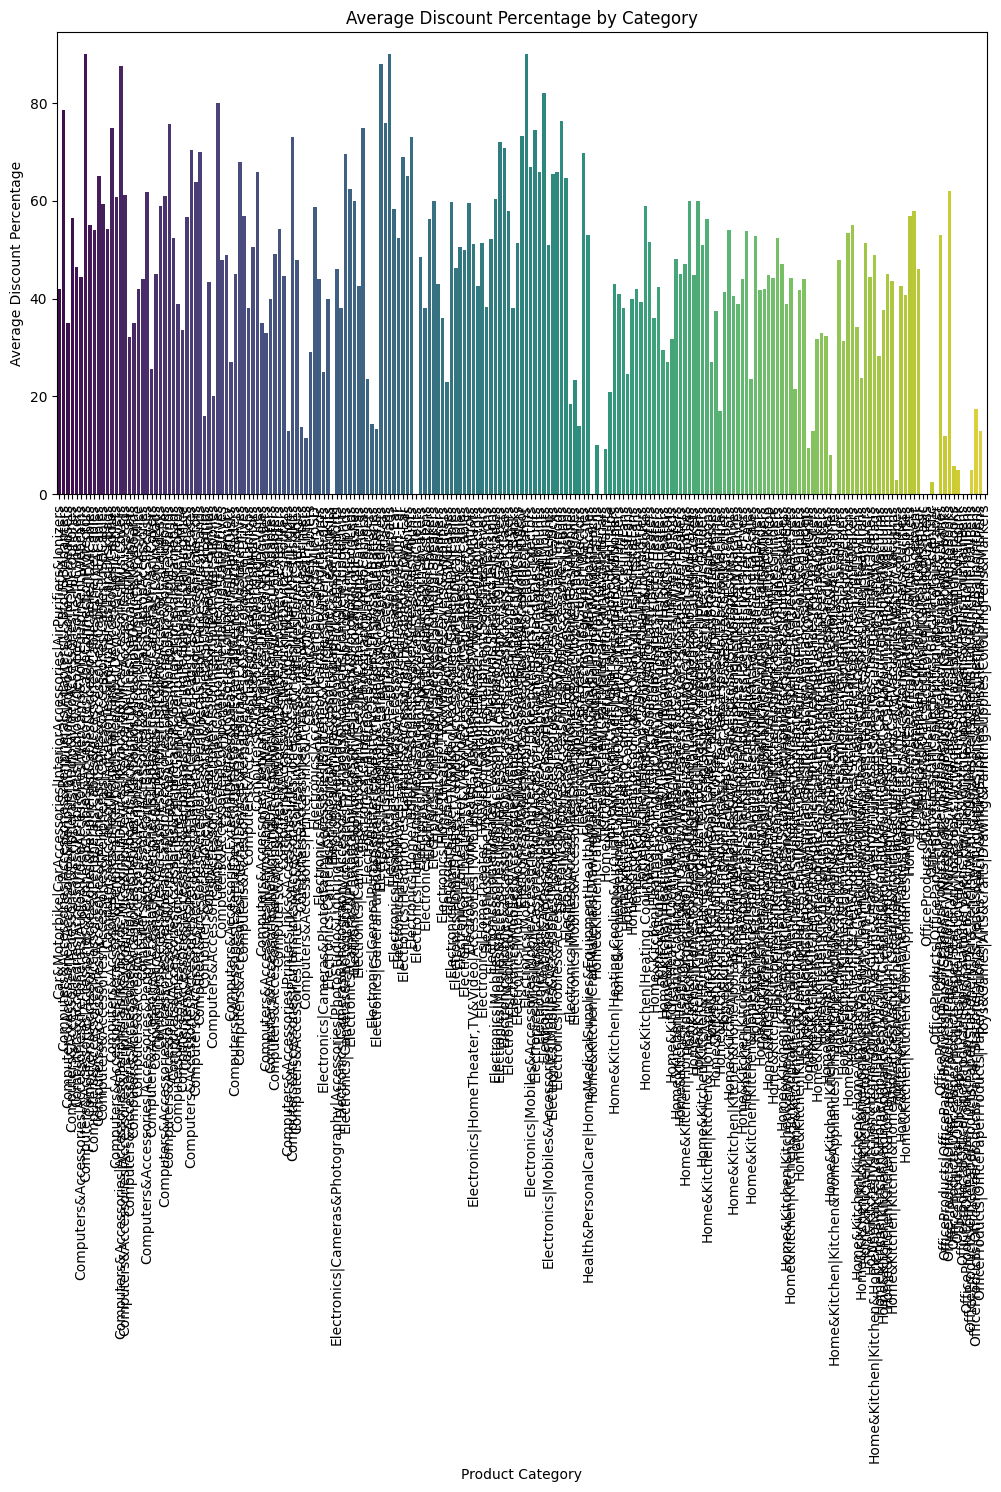

In [84]:
# Q4)  How does the average discount percentage vary across categories

# Ensure all values in 'discount_percentage' are strings and remove any '%' signs
df_amazon['discount_percentage'] = df_amazon['discount_percentage'].apply(lambda x: str(x).replace('%', '') if isinstance(x, str) else str(x))

# Convert the column to float, handling any missing values
df_amazon['discount_percentage'] = pd.to_numeric(df_amazon['discount_percentage'], errors='coerce')

# Now calculate the average discount percentage by category
average_discount_by_category = df_amazon.groupby('category')['discount_percentage'].mean().reset_index()

# Plot the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=average_discount_by_category, x='category', y='discount_percentage', palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Discount Percentage by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Discount Percentage')
plt.show()


In [86]:
# Q5)  What are the most popular product names

# Ensure that 'rating_count' is numeric, coercing any non-numeric values to NaN
df_amazon['rating_count'] = pd.to_numeric(df_amazon['rating_count'], errors='coerce')

# Group by product name and sum the rating_count
most_popular_products = df_amazon.groupby('product_name')['rating_count'].sum().reset_index()

# Sort by rating_count in descending order to get the most popular products
most_popular_products = most_popular_products.sort_values(by='rating_count', ascending=False)

# Display the top 10 most popular products
top_10_products = most_popular_products.head(10)

# Show the top 10 most popular product names
print(top_10_products)


                                           product_name  rating_count
325   Duracell USB Lightning Apple Certified (Mfi) B...        2445.0
1237  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...        1948.0
121   Ambrane 2 in 1 Type-C & Micro USB Cable with 6...        1806.0
1179  Wecool Unbreakable 3 in 1 Charging Cable with ...        1312.0
1022  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...        1151.0
947   SWAPKART Fast Charging Cable and Data Sync USB...        1072.0
363   Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
365        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
807   Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
1239  Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0


In [91]:
# Q6)  What are the most popular product keywords

# Step 1: Import the necessary library
from collections import Counter  # Importing Counter from collections module

import re  # Regular expression module for cleaning text

# Step 2: Combine all product names into one large string (avoid missing data)
all_product_names = ' '.join(df_amazon['product_name'].dropna().astype(str))

# Step 3: Clean the product names by removing non-alphabetical characters and converting to lowercase
cleaned_product_names = re.sub(r'[^a-zA-Z\s]', '', all_product_names.lower())

# Step 4: Split the cleaned string into individual words (keywords)
keywords = cleaned_product_names.split()

# Step 5: Count the frequency of each keyword
keyword_counts = Counter(keywords)

# Step 6: Get the 10 most common keywords
most_common_keywords = keyword_counts.most_common(10)

# Display the top 10 most common product keywords
print(most_common_keywords)


[('with', 752), ('for', 674), ('black', 470), ('cable', 403), ('usb', 391), ('and', 330), ('charging', 246), ('to', 218), ('a', 214), ('fast', 211)]


In [92]:
# Q7)  What are the most popular product reviews

# Step 1: Sort the data by 'rating_count' to get the most popular reviews
most_popular_reviews = df_amazon[['product_name', 'review_title', 'review_content', 'rating_count']]

# Step 2: Sort the reviews by 'rating_count' in descending order to get the most popular
most_popular_reviews_sorted = most_popular_reviews.sort_values(by='rating_count', ascending=False)

# Step 3: Display the top 10 most popular reviews
top_10_reviews = most_popular_reviews_sorted.head(10)

# Display the result
print(top_10_reviews[['product_name', 'review_title', 'review_content', 'rating_count']])


                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...   
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...   
214   Crypo™ Universal Remote Compatible with Tata S...   
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
1059  Kettle is good but bottle is not good quality,...   
151   Great Cable, Charging Speeds Could Be Better,G...   
32    Great Cable, Charging Speeds Could Be Better,G...

In [100]:
# Q8)  What is the correlation between discounted_price and rating

# Check for NaN values in 'discounted_price' and 'rating'
nan_discounted_price = df_amazon['discounted_price'].isna().sum()
nan_rating = df_amazon['rating'].isna().sum()

# Print the number of NaN values
print(f"Number of NaN values in 'discounted_price': {nan_discounted_price}")
print(f"Number of NaN values in 'rating': {nan_rating}")

# Check if there are NaN values in 'discounted_price' that would prevent correlation calculation
if nan_discounted_price > 0:
    print("Correlation can't be calculated because 'discounted_price' has NaN values.")
else:
    # Calculate the correlation if no NaN values exist in 'discounted_price'
    correlation = df_amazon['discounted_price'].corr(df_amazon['rating'])
    print(f"The correlation between discounted price and rating is: {correlation}")


Number of NaN values in 'discounted_price': 1465
Number of NaN values in 'rating': 1
Correlation can't be calculated because 'discounted_price' has NaN values.


In [101]:
# Q9)  What are the Top 5 categories based on the highest ratings

# Group by 'category' and calculate the mean rating for each category
top_categories = df_amazon.groupby('category')['rating'].mean()

# Sort the categories by mean rating in descending order and get the top 5
top_5_categories = top_categories.sort_values(ascending=False).head(5)

# Display the top 5 categories
print(top_5_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [ ]:
# Q10)


In [103]:
# Check for missing values across the entire dataset
missing_values = df_amazon.isna().sum()
print(missing_values)


product_id                0
product_name              0
category                  0
discounted_price       1465
actual_price              0
discount_percentage       0
rating                    1
rating_count           1139
about_product             0
user_id                   0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
dtype: int64


In [106]:
# Drop the 'discounted_price' column
df_amazon = df_amazon.drop(columns=['discounted_price'])


In [107]:
# Calculate the IQR to detect outliers
Q1 = df_amazon['rating'].quantile(0.25)
Q3 = df_amazon['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = df_amazon[(df_amazon['rating'] < lower_bound) | (df_amazon['rating'] > upper_bound)].shape[0]

# Output the number of outliers
print(f"Number of outliers in 'rating': {outliers_count}")


Number of outliers in 'rating': 74


In [112]:
# Fill NaN values in 'rating_count' with the median
df_amazon['rating_count'] = df_amazon['rating_count'].fillna(df_amazon['rating_count'].median())

# Check for NaN values in the entire dataset again
nan_values_after = df_amazon.isna().sum()
print(nan_values_after)


product_id             0
product_name           0
category               0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [114]:
# Check for duplicates
duplicate_rows = df_amazon.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicates if any
df_amazon = df_amazon.drop_duplicates()


Number of duplicate rows: 0


In [115]:
# Check for missing values in the dataset
missing_values = df_amazon.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 product_id             0
product_name           0
category               0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [116]:
# Check the data types of each column
data_types = df_amazon.dtypes
print("Data types of each column:\n", data_types)


Data types of each column:
 product_id              object
product_name            object
category                object
actual_price            object
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [117]:
# Convert 'actual_price' to numeric (in case there are any non-numeric characters)
df_amazon['actual_price'] = pd.to_numeric(df_amazon['actual_price'], errors='coerce')

# Check again for NaN values
nan_check = df_amazon.isna().sum()
print("Number of NaN values after conversion:\n", nan_check)


Number of NaN values after conversion:
 product_id                0
product_name              0
category                  0
actual_price           1465
discount_percentage       0
rating                    0
rating_count              0
about_product             0
user_id                   0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
dtype: int64


In [118]:
# Check unique values or problematic entries in 'actual_price'
unique_actual_price = df_amazon['actual_price'].unique()
print(unique_actual_price[:20])  # Print the first 20 unique values for inspection


[nan]


In [119]:
# Drop the 'actual_price' column
df_amazon = df_amazon.drop(columns=['actual_price'])


In [120]:
# Define a function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check for outliers in the 'rating', 'rating_count', and 'discount_percentage' columns
rating_outliers = detect_outliers(df_amazon, 'rating')
rating_count_outliers = detect_outliers(df_amazon, 'rating_count')
discount_percentage_outliers = detect_outliers(df_amazon, 'discount_percentage')

# Output the number of outliers in each column
print("Number of outliers in 'rating':", len(rating_outliers))
print("Number of outliers in 'rating_count':", len(rating_count_outliers))
print("Number of outliers in 'discount_percentage':", len(discount_percentage_outliers))


Number of outliers in 'rating': 74
Number of outliers in 'rating_count': 326
Number of outliers in 'discount_percentage': 0


In [121]:
# Cap the outliers in 'rating', 'rating_count', and 'discount_percentage' columns
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap the outliers for the relevant columns
df_amazon = cap_outliers(df_amazon, 'rating')
df_amazon = cap_outliers(df_amazon, 'rating_count')
df_amazon = cap_outliers(df_amazon, 'discount_percentage')

# Verify if the outliers are capped
print("Outliers in 'rating' after capping:", len(detect_outliers(df_amazon, 'rating')))
print("Outliers in 'rating_count' after capping:", len(detect_outliers(df_amazon, 'rating_count')))
print("Outliers in 'discount_percentage' after capping:", len(detect_outliers(df_amazon, 'discount_percentage')))


Outliers in 'rating' after capping: 0
Outliers in 'rating_count' after capping: 0
Outliers in 'discount_percentage' after capping: 0


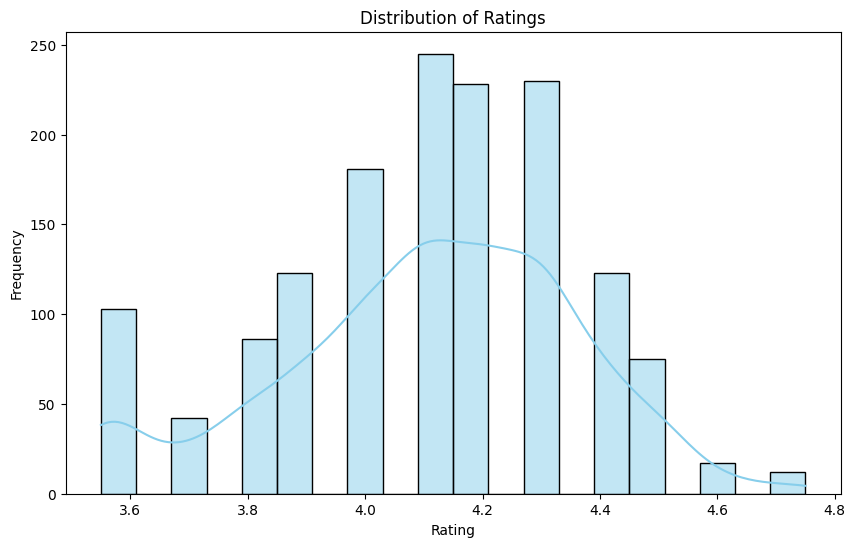

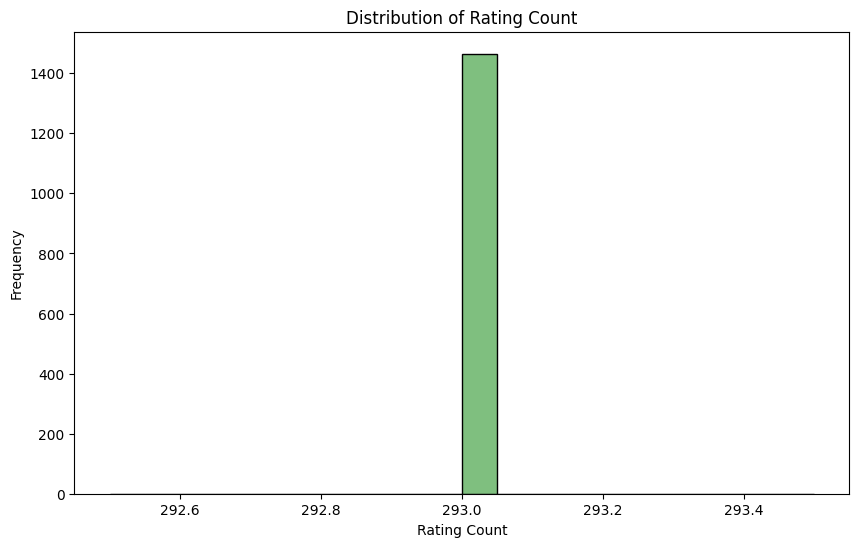

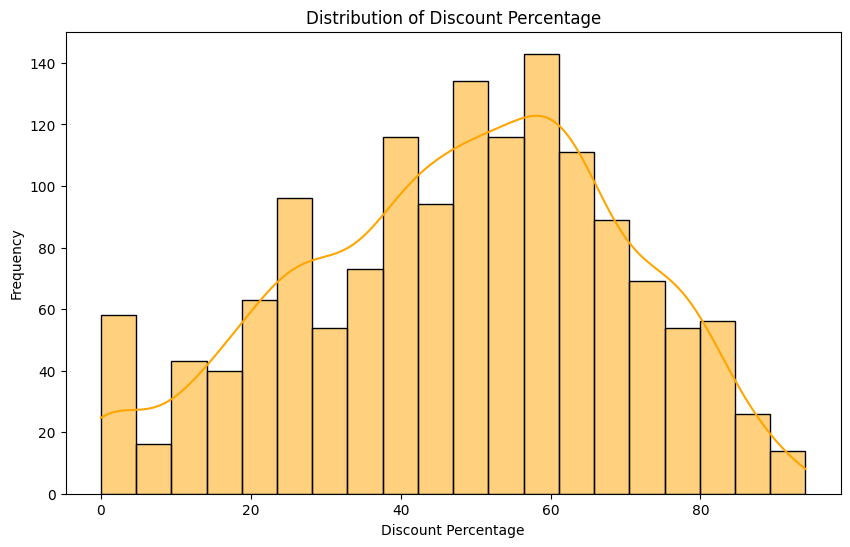

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'rating'
plt.figure(figsize=(10, 6))
sns.histplot(df_amazon['rating'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'rating_count'
plt.figure(figsize=(10, 6))
sns.histplot(df_amazon['rating_count'], kde=True, color='green', bins=20)
plt.title('Distribution of Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'discount_percentage'
plt.figure(figsize=(10, 6))
sns.histplot(df_amazon['discount_percentage'], kde=True, color='orange', bins=20)
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# EDA 4  -  SPOTIFY

In [123]:
from google.colab import files

# Upload file
uploaded = files.upload()


Saving spotify.csv to spotify.csv


In [124]:

df_spotify = pd.read_csv('spotify.csv')
df_spotify







Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]

In [129]:
# Q1)  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

# Check for null values in the dataset
null_values = df_spotify.isnull().sum()

# Display the columns with null values (if any)
print("Null Values per Column:")
print(null_values)

# Check for duplicate rows
duplicate_rows = df_spotify.duplicated().sum()

# Display the number of duplicate rows
print("\n\n",f"Number of Duplicate Rows: {duplicate_rows}")

# Remove duplicate rows (if any)
df_spotify.drop_duplicates(inplace=True)

# Display the dataset after removing duplicates
df_spotify.head()



Null Values per Column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


 Number of Duplicate Rows: 0


Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe

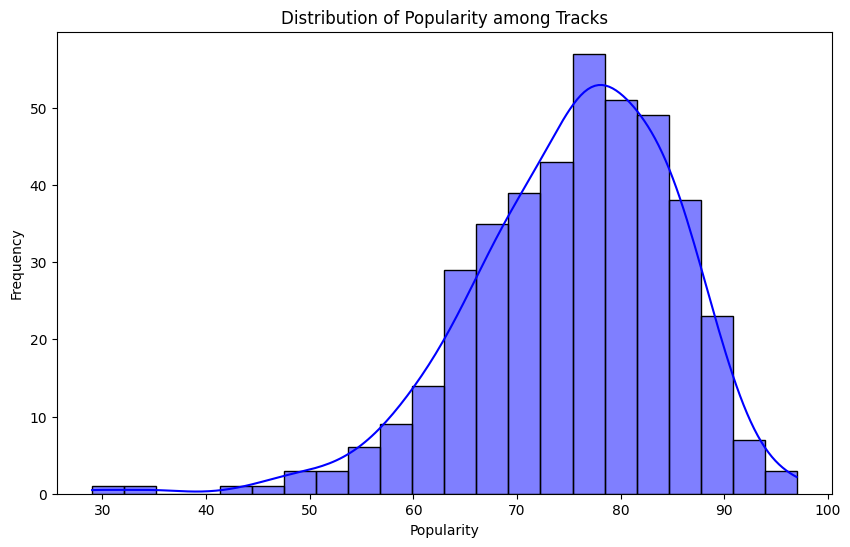

In [130]:
# Q2)  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of popularity
plt.figure(figsize=(10,6))
sns.histplot(df_spotify['Popularity'], kde=True, color='blue')

# Add title and labels
plt.title('Distribution of Popularity among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# Display the plot
plt.show()


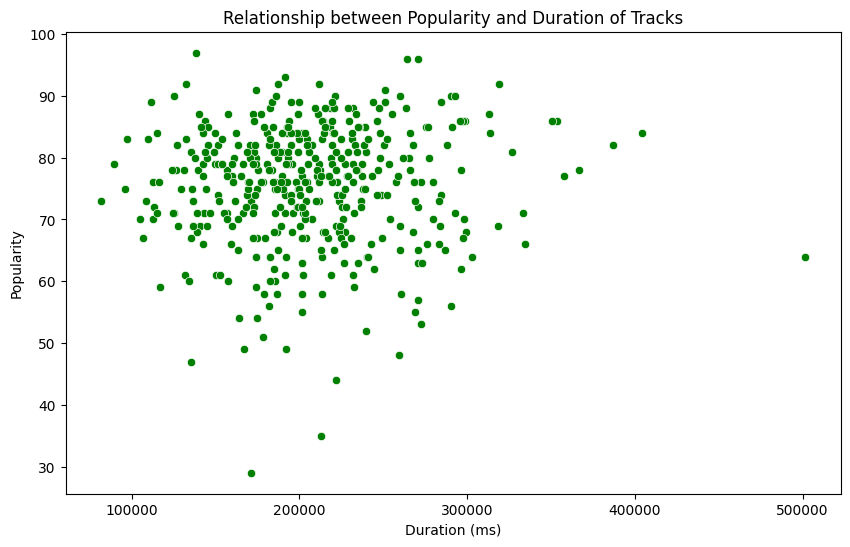

In [131]:
# Q3)  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

# Plot the relationship between Popularity and Duration (ms)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df_spotify, color='green')

# Add title and labels
plt.title('Relationship between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')

# Display the plot
plt.show()


In [132]:
# Q4)  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

# Find the artist with the highest number of tracks
artist_with_max_tracks = df_spotify['Artist'].value_counts().idxmax()
track_count = df_spotify['Artist'].value_counts().max()

print(f"The artist with the highest number of tracks is: {artist_with_max_tracks} with {track_count} tracks.")


The artist with the highest number of tracks is: Drake with 17 tracks.


<ipython-input-133-f92dbcb8a90b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_spotify, x='Artist', order=df_spotify['Artist'].value_counts().index, palette='Set2')


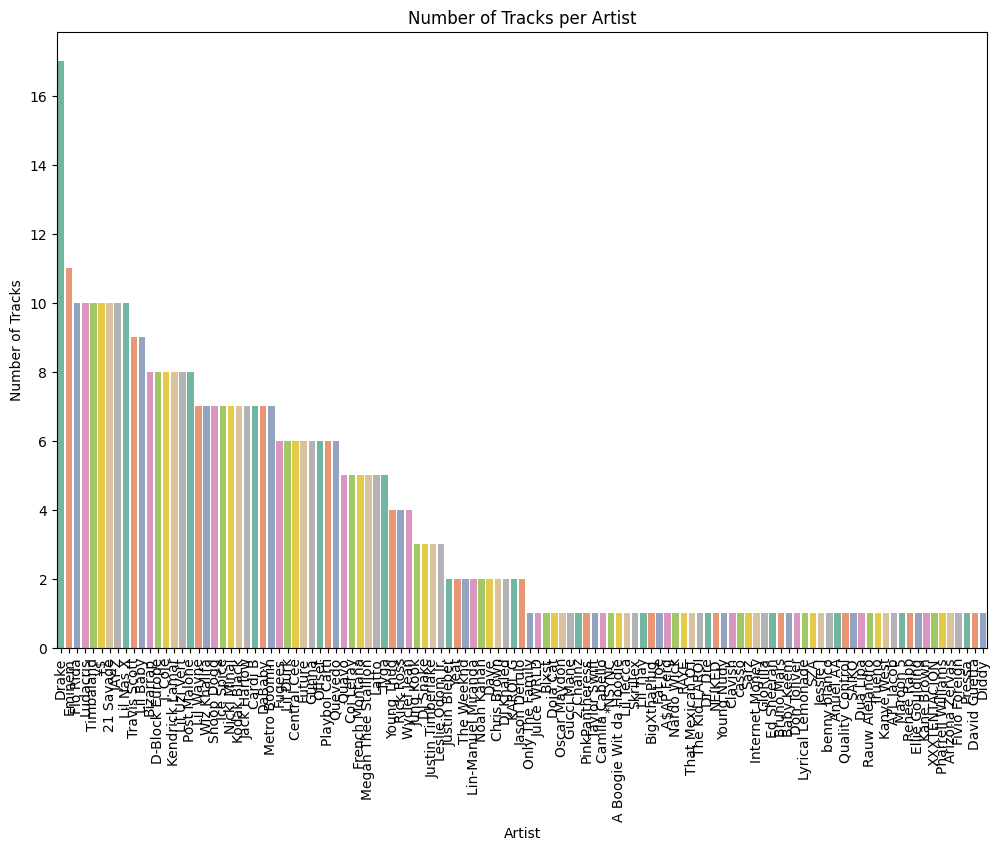

In [133]:
# Plot the count of tracks for each artist
plt.figure(figsize=(12,8))
sns.countplot(data=df_spotify, x='Artist', order=df_spotify['Artist'].value_counts().index, palette='Set2')

# Add title and labels
plt.title('Number of Tracks per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


In [134]:
# Sort the dataset by Popularity in ascending order
least_popular_tracks = df_spotify[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity', ascending=True)

# Get the top 5 least popular tracks
top_5_least_popular = least_popular_tracks.head(5)

# Q5) What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

# Display the result
print("Top 5 Least Popular Tracks:")
print(top_5_least_popular)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [135]:
# Q6)  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

# Calculate the average popularity for each artist
artist_avg_popularity = df_spotify.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Get the top 5 artists with the highest average popularity
top_5_artists = artist_avg_popularity.head(5)

# Display the top 5 artists with their average popularity
print("Top 5 Artists with the Highest Average Popularity:")
print(top_5_artists)


Top 5 Artists with the Highest Average Popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


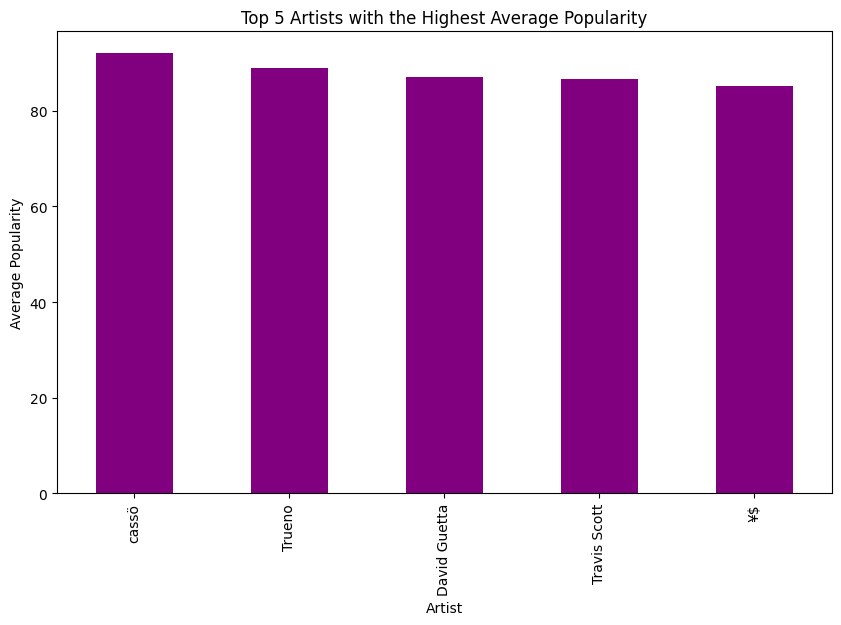

In [136]:
# Plot the average popularity for the top 5 artists
plt.figure(figsize=(10,6))
top_5_artists.plot(kind='bar', color='purple')

# Add title and labels
plt.title('Top 5 Artists with the Highest Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')

# Display the plot
plt.show()


In [137]:
# Q7)  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

# Step 1: Calculate average popularity and get top 5 artists
artist_avg_popularity = df_spotify.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
top_5_artists = artist_avg_popularity.head(5).index

# Step 2: Get the most popular track for each of the top 5 artists
most_popular_tracks = []

for artist in top_5_artists:
    # Filter tracks for the artist and get the most popular track
    artist_tracks = df_spotify[df_spotify['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    most_popular_tracks.append({
        'Artist': most_popular_track['Artist'],
        'Track Name': most_popular_track['Track Name'],
        'Popularity': most_popular_track['Popularity']
    })

# Convert the results into a DataFrame for better display
most_popular_tracks_df = pd.DataFrame(most_popular_tracks)

# Display the result
print("Most Popular Track for Each of the Top 5 Artists:")
print(most_popular_tracks_df)


Most Popular Track for Each of the Top 5 Artists:
         Artist                    Track Name  Popularity
0         cassö                         Prada          92
1        Trueno  Mamichula - con Nicki Nicole          89
2  David Guetta            Baby Don't Hurt Me          87
3  Travis Scott    FE!N (feat. Playboi Carti)          93
4            ¥$                      CARNIVAL          96


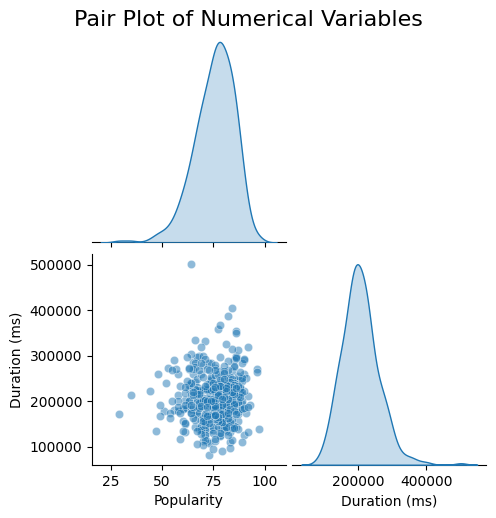

In [138]:
# Q8) Visualize relationships between multiple numerical variables simultaneously using a pair plot


# Select numerical columns for the pair plot
numerical_columns = ['Popularity', 'Duration (ms)']

# Create a pair plot
sns.pairplot(df_spotify[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.5}, corner=True)

# Add a title (requires setting title after the plot is created)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)

# Show the plot
plt.show()


<ipython-input-139-8c9b42d79718>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Artist', y='Duration (ms)', data=df_spotify, order=df_spotify['Artist'].value_counts().index[:10], palette='Set3')


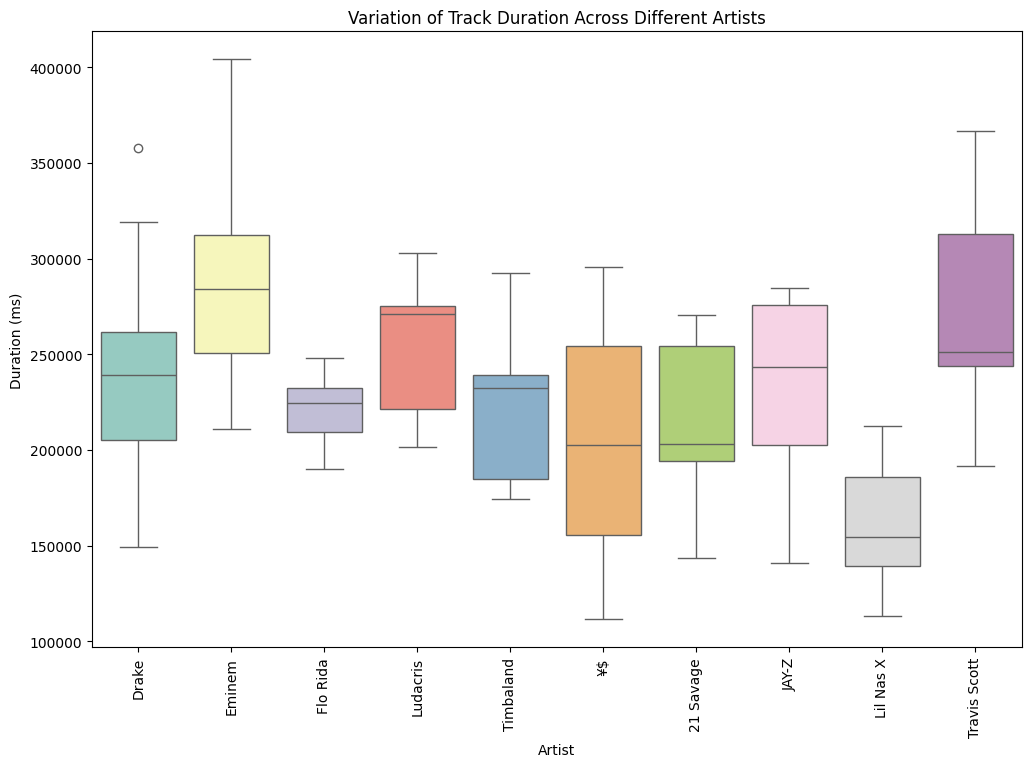

In [139]:
# Q9) Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

# Visualize the variation of track duration across different artists using a box plot
plt.figure(figsize=(12,8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_spotify, order=df_spotify['Artist'].value_counts().index[:10], palette='Set3')

# Add title and labels
plt.title('Variation of Track Duration Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


<ipython-input-140-46b639c8381f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Duration (ms)', data=df_spotify, order=df_spotify['Artist'].value_counts().index[:10], palette='Set2')


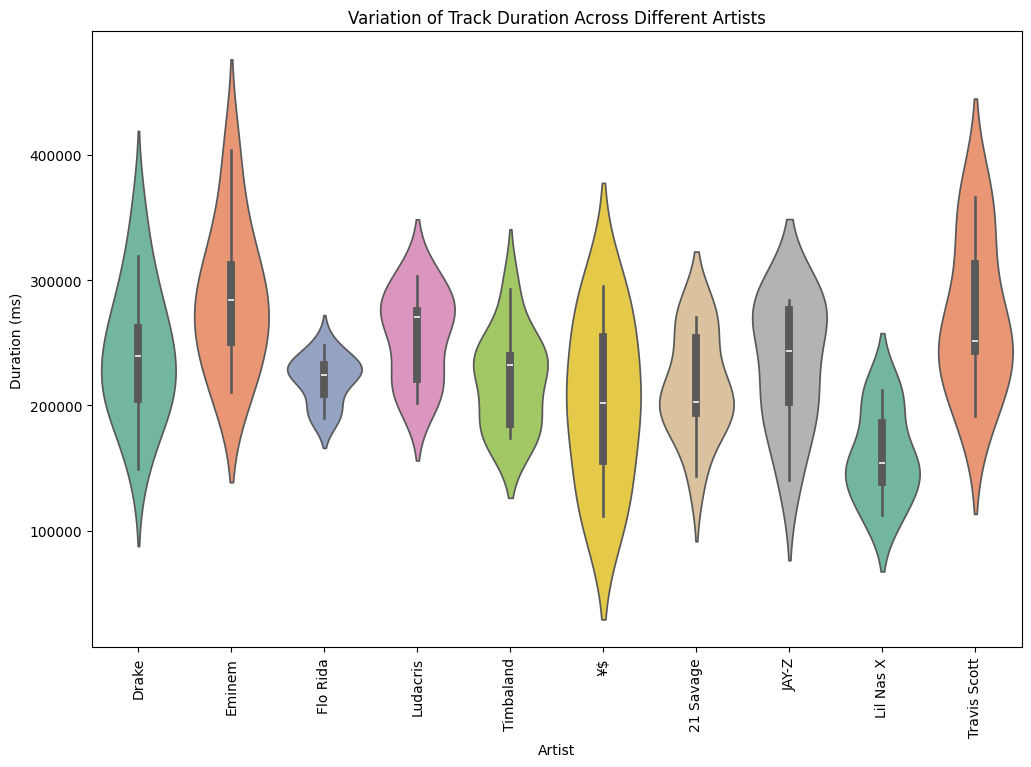

In [140]:
# Visualize the variation of track duration across different artists using a violin plot
plt.figure(figsize=(12,8))
sns.violinplot(x='Artist', y='Duration (ms)', data=df_spotify, order=df_spotify['Artist'].value_counts().index[:10], palette='Set2')

# Add title and labels
plt.title('Variation of Track Duration Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


<ipython-input-141-2ab97fc81308>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Artist', y='Popularity', data=df_spotify,


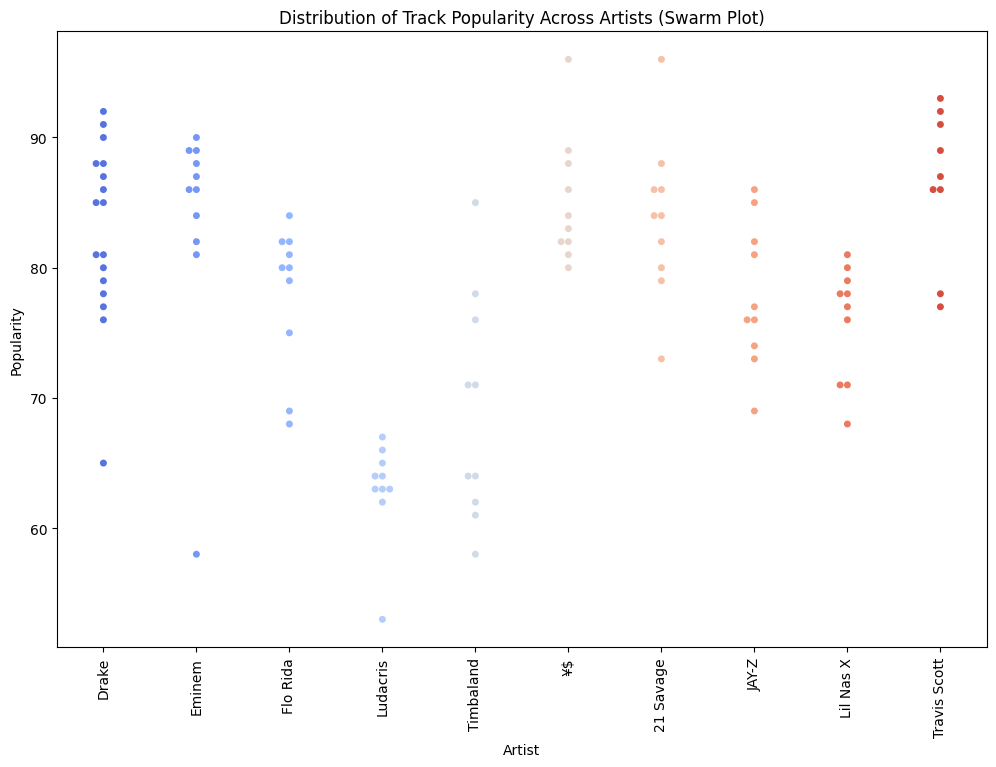

In [141]:
# Q10)  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

# Visualize the distribution of track popularity using a swarm plot
plt.figure(figsize=(12,8))
sns.swarmplot(x='Artist', y='Popularity', data=df_spotify,
              order=df_spotify['Artist'].value_counts().index[:10], palette='coolwarm', size=5)

# Add title and labels
plt.title('Distribution of Track Popularity Across Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


<ipython-input-142-b2985abff1e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=df_spotify,


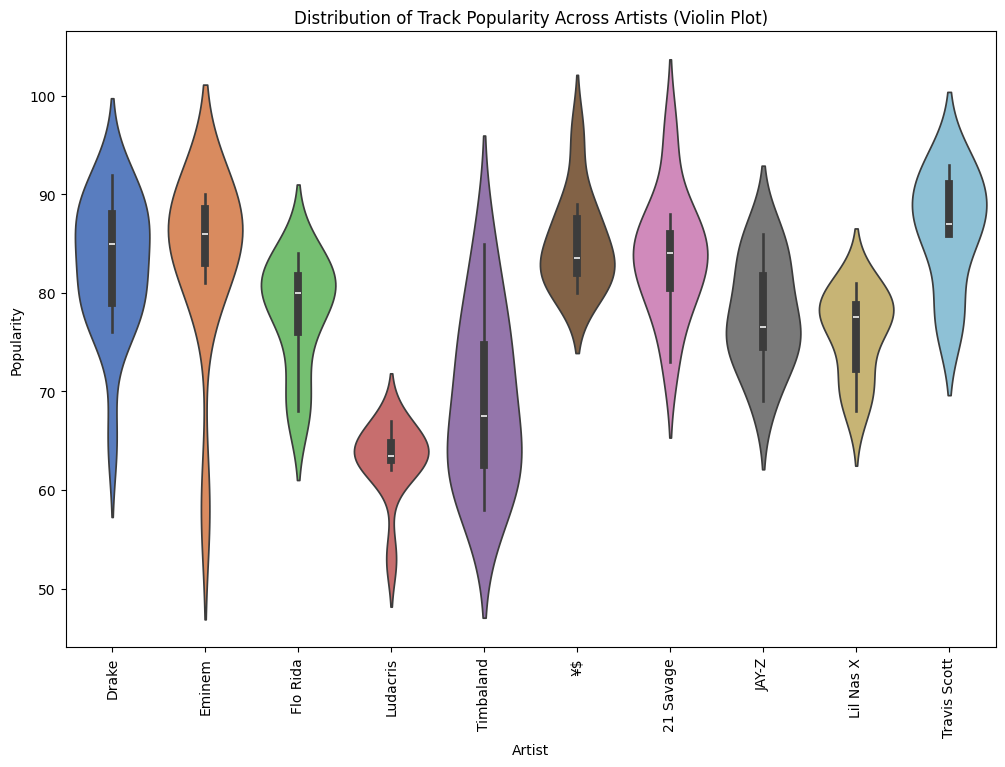

In [142]:
# Visualize the distribution of track popularity using a violin plot
plt.figure(figsize=(12,8))
sns.violinplot(x='Artist', y='Popularity', data=df_spotify,
               order=df_spotify['Artist'].value_counts().index[:10], palette='muted')

# Add title and labels
plt.title('Distribution of Track Popularity Across Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()
